# Imports

In [28]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import os
import numpy as np 
import pandas as pd
import os
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks

In [29]:
train=pd.read_csv("/kaggle/input/gc-2023/train.csv")
test=pd.read_csv("/kaggle/input/gc-2023/test.csv")
sample_sub=pd.read_csv("/kaggle/input/gc22-23/Sample_Submission Kaggle.csv")

In [30]:
train

Unit ID  TimeStamp  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0             0        1.0    0.4337    0.7431    0.9390    0.7541    0.9035   
1             0        2.0    0.7859    0.1925    0.9024    0.8108    0.2016   
2             0        3.0    0.0512    0.9633    0.1423    0.8404    0.6654   
3             0        4.0    0.0413    0.1588    0.1675    0.0971    0.2918   
4             0        5.0    0.7042    0.4724    0.3901    0.2793    0.2522   
...         ...        ...       ...       ...       ...       ...       ...   
549995    49999        7.0    0.2817    0.6392    0.9709    0.5667    0.0822   
549996    49999        8.0    0.5622    0.7094    0.1205    0.7765    0.5579   
549997    49999        9.0    0.3565    0.4717    0.6521    0.6147    0.2524   
549998    49999       10.0    0.7871    0.2163    0.1643    0.2265    0.9406   
549999        1        NaN       NaN       NaN       NaN       NaN       NaN   

        Sensor 6  Sensor 7  Sensor 8  ...  Sensor 16  Sensor 17  Sensor 18  \
0         0.7943    0.2622    0.5901  ...     0.5696     0.6407     0.7027   
1         0.9649    0.2445    0.8934  ...     0.4259     0.7456     0.5750   
2         0.4348    0.5751    0.8067  ...     0.4753     0.5449     0.8531   
3         0.1970    0.0971    0.2039  ...     0.7959     0.5306     0.3109   
4         0.1933    0.2694    0.4110  ...     0.2474     0.5711     0.5686   
...          ...       ...       ...  ...        ...        ...        ...   
549995    0.9976    0.7358    0.9617  ...     0.9600     0.4254     0.7402   
549996    0.4585    0.0583    0.1459  ...     0.7685     0.7410     0.9113   
549997    0.3296    0.1769    0.9617  ...     0.5341     0.8423     0.5090   
549998    0.6559    0.5830    0.4123  ...     0.2767     0.0436     0.8426   
549999       NaN       NaN       NaN  ...        NaN        NaN        NaN   

        Sensor 19  Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  \
0          0.7163     0.9954     0.8303     0.1641     0.7893     0.7533   
1          0.7947     0.4663     0.4303     0.3643     0.0558     0.1330   
2          0.6337     0.8807     0.2560     0.0597     0.5751     0.7797   
3          0.2726     0.3298     0.4658     0.7479     0.8747     0.2677   
4          0.6575     0.1447     0.5774     0.4022     0.6753     0.8371   
...           ...        ...        ...        ...        ...        ...   
549995     0.2611     0.8659     0.7473     0.1093     0.3094     0.7807   
549996     0.3729     0.1165     0.0866     0.2817     0.4906     0.7756   
549997     0.8436     0.9809     0.2696     0.5609     0.6706     0.1297   
549998     0.2371     0.6578     0.0270     0.7201     0.4489     0.4848   
549999        NaN        NaN        NaN        NaN        NaN        NaN   

        Sensor 25  
0          0.2925  
1          0.0295  
2          0.8544  
3          0.3816  
4          0.6748  
...           ...  
549995     0.7287  
549996     0.5428  
549997     0.8826  
549998     0.5125  
549999        NaN  

[550000 rows x 27 columns]

In [31]:
train.describe()

Unit ID      TimeStamp       Sensor 1       Sensor 2  \
count  550000.000000  500000.000000  500000.000000  500000.000000   
mean    22726.956349       5.500000       0.499646       0.500296   
std     15525.428308       2.872284       0.288652       0.288496   
min         0.000000       1.000000       0.000000       0.000000   
25%      8749.750000       3.000000       0.249900       0.250800   
50%     22499.500000       5.500000       0.499600       0.499700   
75%     36249.250000       8.000000       0.749400       0.750300   
max     49999.000000      10.000000       1.000000       1.000000   

            Sensor 3       Sensor 4       Sensor 5       Sensor 6  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.499995       0.500033       0.500318       0.500491   
std         0.288808       0.288599       0.288603       0.288693   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.249400       0.250400       0.250900       0.250700   
50%         0.500400       0.500500       0.500100       0.500600   
75%         0.749925       0.749600       0.749800       0.750600   
max         1.000000       1.000000       1.000000       1.000000   

            Sensor 7       Sensor 8  ...      Sensor 16      Sensor 17  \
count  500000.000000  500000.000000  ...  500000.000000  500000.000000   
mean        0.499761       0.499674  ...       0.500060       0.500664   
std         0.288808       0.288567  ...       0.288754       0.288270   
min         0.000000       0.000000  ...       0.000000       0.000000   
25%         0.249700       0.249600  ...       0.250300       0.251800   
50%         0.499600       0.499500  ...       0.499750       0.500500   
75%         0.749900       0.749600  ...       0.750500       0.750300   
max         1.000000       1.000000  ...       1.000000       1.000000   

           Sensor 18      Sensor 19      Sensor 20      Sensor 21  \
count  500000.000000  500000.000000  500000.000000  500000.000000   
mean        0.500395       0.500221       0.500455       0.499851   
std         0.288906       0.288865       0.288643       0.288304   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.250000       0.249900       0.250600       0.250100   
50%         0.500600       0.500900       0.500300       0.500200   
75%         0.750900       0.750300       0.750500       0.749400   
max         1.000000       1.000000       1.000000       1.000000   

           Sensor 22      Sensor 23      Sensor 24      Sensor 25  
count  500000.000000  500000.000000  500000.000000  500000.000000  
mean        0.500049       0.499837       0.500127       0.500587  
std         0.288654       0.288483       0.288675       0.288442  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.249800       0.250500       0.250400       0.251000  
50%         0.500100       0.499000       0.500300       0.501100  
75%         0.749800       0.749400       0.750400       0.750000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 27 columns]

In [32]:
test

Unit ID  Timestamp  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0       50000          1    0.3786    0.7031    0.0734    0.0492    0.8328   
1       50000          2    0.0871    0.3716    0.1444    0.4848    0.8051   
2       50000          3    0.7733    0.3273    0.0397    0.2026    0.7231   
3       50000          4    0.4817    0.6624    0.3319    0.7669    0.4364   
4       50000          5    0.0100    0.8568    0.5611    0.0171    0.2108   
...       ...        ...       ...       ...       ...       ...       ...   
9995    50999          6    0.5563    0.0273    0.4050    0.0035    0.8710   
9996    50999          7    0.0702    0.7417    0.8893    0.3615    0.6888   
9997    50999          8    0.1935    0.8997    0.3039    0.9757    0.5910   
9998    50999          9    0.2718    0.7367    0.6270    0.8462    0.4284   
9999    50999         10    0.0469    0.0085    0.3151    0.5123    0.2128   

      Sensor 6  Sensor 7  Sensor 8  ...  Sensor 16  Sensor 17  Sensor 18  \
0       0.9048    0.7850    0.9979  ...     0.6897     0.9130     0.5681   
1       0.6569    0.8121    0.5083  ...     0.6067     0.1750     0.3267   
2       0.4640    0.2385    0.0435  ...     0.2943     0.5956     0.4769   
3       0.1332    0.4890    0.7637  ...     0.4996     0.2766     0.4083   
4       0.1046    0.4475    0.8220  ...     0.2412     0.4066     0.2261   
...        ...       ...       ...  ...        ...        ...        ...   
9995    0.3533    0.8382    0.5167  ...     0.6842     0.8704     0.1593   
9996    0.5658    0.9178    0.6649  ...     0.1328     0.3443     0.7526   
9997    0.5253    0.0459    0.3327  ...     0.0930     0.1710     0.2240   
9998    0.4649    0.0397    0.3281  ...     0.3151     0.1197     0.4840   
9999    0.2023    0.7841    0.9495  ...     0.5829     0.4715     0.2034   

      Sensor 19  Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  \
0        0.0129     0.4369     0.5533     0.2384     0.4805     0.3959   
1        0.1499     0.4746     0.2572     0.7884     0.3364     0.8252   
2        0.8894     0.8833     0.0786     0.4448     0.0071     0.4052   
3        0.9838     0.5823     0.3014     0.2781     0.1267     0.7782   
4        0.1200     0.8346     0.3691     0.5683     0.1112     0.7261   
...         ...        ...        ...        ...        ...        ...   
9995     0.1494     0.6192     0.2081     0.4659     0.8334     0.6913   
9996     0.0556     0.8064     0.5836     0.7398     0.6256     0.6917   
9997     0.8013     0.1723     0.4518     0.9341     0.5166     0.2043   
9998     0.5379     0.7549     0.3839     0.6309     0.8746     0.6079   
9999     0.5418     0.6209     0.7071     0.8569     0.7406     0.1911   

      Sensor 25  
0        0.4756  
1        0.8013  
2        0.5436  
3        0.1162  
4        0.5521  
...         ...  
9995     0.2214  
9996     0.8379  
9997     0.9384  
9998     0.4322  
9999     0.3436  

[10000 rows x 27 columns]

In [33]:
test.describe()

Unit ID     Timestamp      Sensor 1      Sensor 2      Sensor 3  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean   50499.500000      5.500000      0.498164      0.502475      0.503575   
std      288.689425      2.872425      0.289464      0.288778      0.288109   
min    50000.000000      1.000000      0.000300      0.000100      0.000600   
25%    50249.750000      3.000000      0.245675      0.252275      0.254775   
50%    50499.500000      5.500000      0.497800      0.500050      0.511200   
75%    50749.250000      8.000000      0.750650      0.753900      0.753900   
max    50999.000000     10.000000      0.999900      0.999900      0.999900   

           Sensor 4      Sensor 5      Sensor 6      Sensor 7      Sensor 8  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.500440      0.495794      0.499412      0.500974      0.498357   
std        0.289232      0.289270      0.290665      0.288970      0.289807   
min        0.000000      0.000000      0.000200      0.000100      0.000000   
25%        0.249175      0.244275      0.246650      0.250475      0.247100   
50%        0.500200      0.493400      0.499400      0.503750      0.499200   
75%        0.752525      0.747400      0.752200      0.751400      0.750025   
max        0.999700      0.999900      1.000000      0.999700      0.999800   

       ...     Sensor 16     Sensor 17     Sensor 18     Sensor 19  \
count  ...  10000.000000  10000.000000  10000.000000  10000.000000   
mean   ...      0.499741      0.498108      0.499125      0.505326   
std    ...      0.288718      0.288904      0.288626      0.288309   
min    ...      0.000100      0.000000      0.000000      0.000200   
25%    ...      0.250600      0.246475      0.252700      0.256575   
50%    ...      0.500000      0.493000      0.495550      0.507050   
75%    ...      0.750125      0.749000      0.746225      0.756525   
max    ...      0.999800      0.999700      0.999900      1.000000   

          Sensor 20     Sensor 21     Sensor 22     Sensor 23     Sensor 24  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.497264      0.495360      0.502532      0.499939      0.499702   
std        0.288123      0.290265      0.284875      0.288150      0.288468   
min        0.000100      0.000000      0.000000      0.000100      0.000000   
25%        0.243875      0.244600      0.260050      0.253775      0.250600   
50%        0.497450      0.490800      0.501750      0.496850      0.498800   
75%        0.746225      0.748850      0.749525      0.751825      0.748500   
max        0.999400      1.000000      0.999900      0.999800      0.999700   

          Sensor 25  
count  10000.000000  
mean       0.499807  
std        0.289000  
min        0.000100  
25%        0.251775  
50%        0.498800  
75%        0.749400  
max        0.999900  

[8 rows x 27 columns]

In [34]:
# Define the indices you want to select
indices_to_select = [(10 * (i + 1) + i) for i in range(50000)]

# Extract the selected rows and the first column from the original dataset
selected_values = train.iloc[indices_to_select, 0]

# Create a new dataset with the selected values as a column
Risk = pd.DataFrame({'Risk': selected_values})

Risk.reset_index(drop=True, inplace=True)

Risk

Risk
0         1
1         2
2         3
3         1
4         1
...     ...
49995     0
49996     3
49997     1
49998     0
49999     1

[50000 rows x 1 columns]

In [35]:
repo=pd.DataFrame()
repo=train
repo = repo.dropna()
repo.reset_index(drop=True, inplace=True)

In [36]:
repo

Unit ID  TimeStamp  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0             0        1.0    0.4337    0.7431    0.9390    0.7541    0.9035   
1             0        2.0    0.7859    0.1925    0.9024    0.8108    0.2016   
2             0        3.0    0.0512    0.9633    0.1423    0.8404    0.6654   
3             0        4.0    0.0413    0.1588    0.1675    0.0971    0.2918   
4             0        5.0    0.7042    0.4724    0.3901    0.2793    0.2522   
...         ...        ...       ...       ...       ...       ...       ...   
499995    49999        6.0    0.1691    0.9308    0.4897    0.7745    0.6919   
499996    49999        7.0    0.2817    0.6392    0.9709    0.5667    0.0822   
499997    49999        8.0    0.5622    0.7094    0.1205    0.7765    0.5579   
499998    49999        9.0    0.3565    0.4717    0.6521    0.6147    0.2524   
499999    49999       10.0    0.7871    0.2163    0.1643    0.2265    0.9406   

        Sensor 6  Sensor 7  Sensor 8  ...  Sensor 16  Sensor 17  Sensor 18  \
0         0.7943    0.2622    0.5901  ...     0.5696     0.6407     0.7027   
1         0.9649    0.2445    0.8934  ...     0.4259     0.7456     0.5750   
2         0.4348    0.5751    0.8067  ...     0.4753     0.5449     0.8531   
3         0.1970    0.0971    0.2039  ...     0.7959     0.5306     0.3109   
4         0.1933    0.2694    0.4110  ...     0.2474     0.5711     0.5686   
...          ...       ...       ...  ...        ...        ...        ...   
499995    0.7147    0.1966    0.7731  ...     0.8995     0.4435     0.0846   
499996    0.9976    0.7358    0.9617  ...     0.9600     0.4254     0.7402   
499997    0.4585    0.0583    0.1459  ...     0.7685     0.7410     0.9113   
499998    0.3296    0.1769    0.9617  ...     0.5341     0.8423     0.5090   
499999    0.6559    0.5830    0.4123  ...     0.2767     0.0436     0.8426   

        Sensor 19  Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  \
0          0.7163     0.9954     0.8303     0.1641     0.7893     0.7533   
1          0.7947     0.4663     0.4303     0.3643     0.0558     0.1330   
2          0.6337     0.8807     0.2560     0.0597     0.5751     0.7797   
3          0.2726     0.3298     0.4658     0.7479     0.8747     0.2677   
4          0.6575     0.1447     0.5774     0.4022     0.6753     0.8371   
...           ...        ...        ...        ...        ...        ...   
499995     0.6193     0.3040     0.9287     0.3918     0.2143     0.8486   
499996     0.2611     0.8659     0.7473     0.1093     0.3094     0.7807   
499997     0.3729     0.1165     0.0866     0.2817     0.4906     0.7756   
499998     0.8436     0.9809     0.2696     0.5609     0.6706     0.1297   
499999     0.2371     0.6578     0.0270     0.7201     0.4489     0.4848   

        Sensor 25  
0          0.2925  
1          0.0295  
2          0.8544  
3          0.3816  
4          0.6748  
...           ...  
499995     0.3380  
499996     0.7287  
499997     0.5428  
499998     0.8826  
499999     0.5125  

[500000 rows x 27 columns]

In [37]:
# Reset the index and make the previous index values a new column
risk_final = Risk.reset_index()

# Rename the new column to 'NewColumnName'
risk_final = risk_final.rename(columns={'index': 'Unit ID'})
risk_final

Unit ID  Risk
0            0     1
1            1     2
2            2     3
3            3     1
4            4     1
...        ...   ...
49995    49995     0
49996    49996     3
49997    49997     1
49998    49998     0
49999    49999     1

[50000 rows x 2 columns]

# Graphs

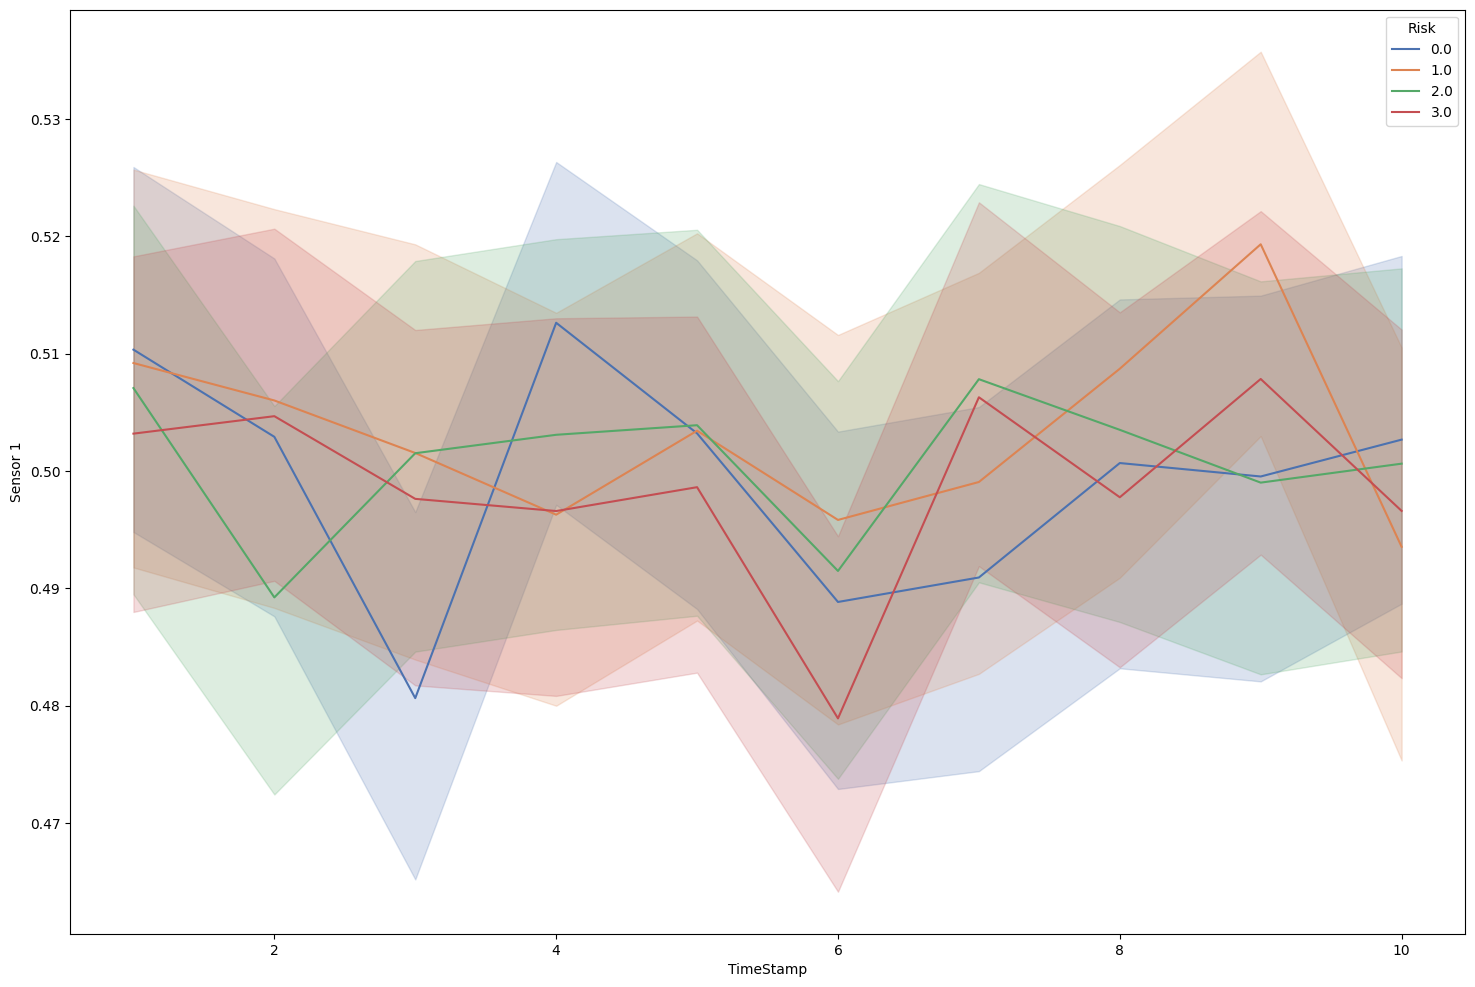

In [38]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 1"], hue=risk_final["Risk"],palette="deep")
plt.show()

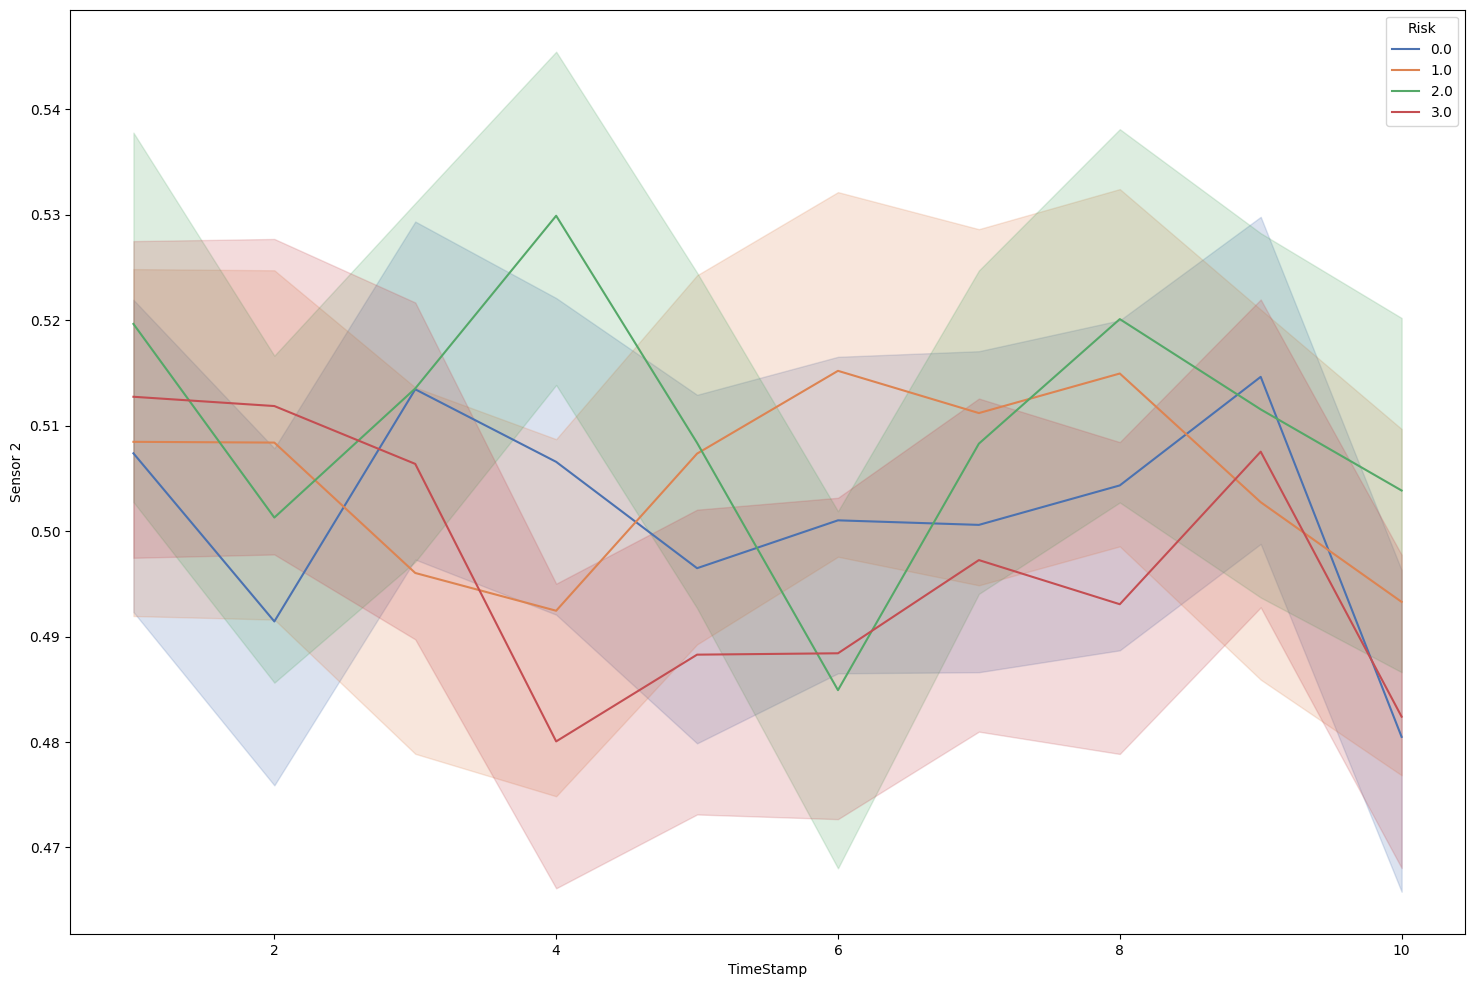

In [39]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 2"], hue=risk_final["Risk"],palette="deep")
plt.show()

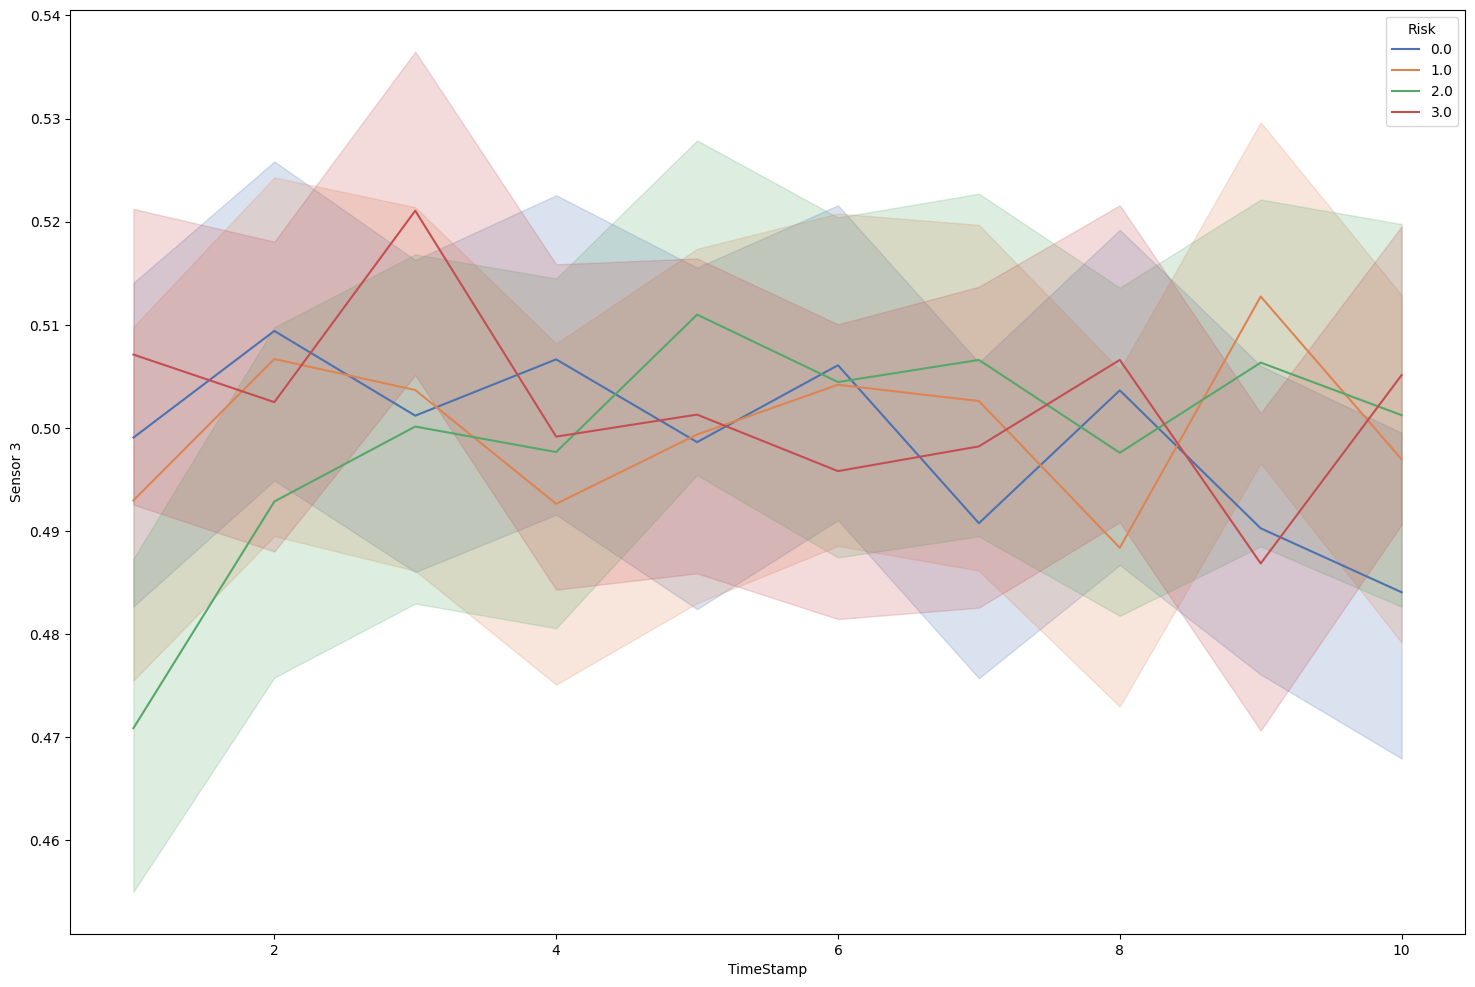

In [40]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 3"], hue=risk_final["Risk"],palette="deep")
plt.show()

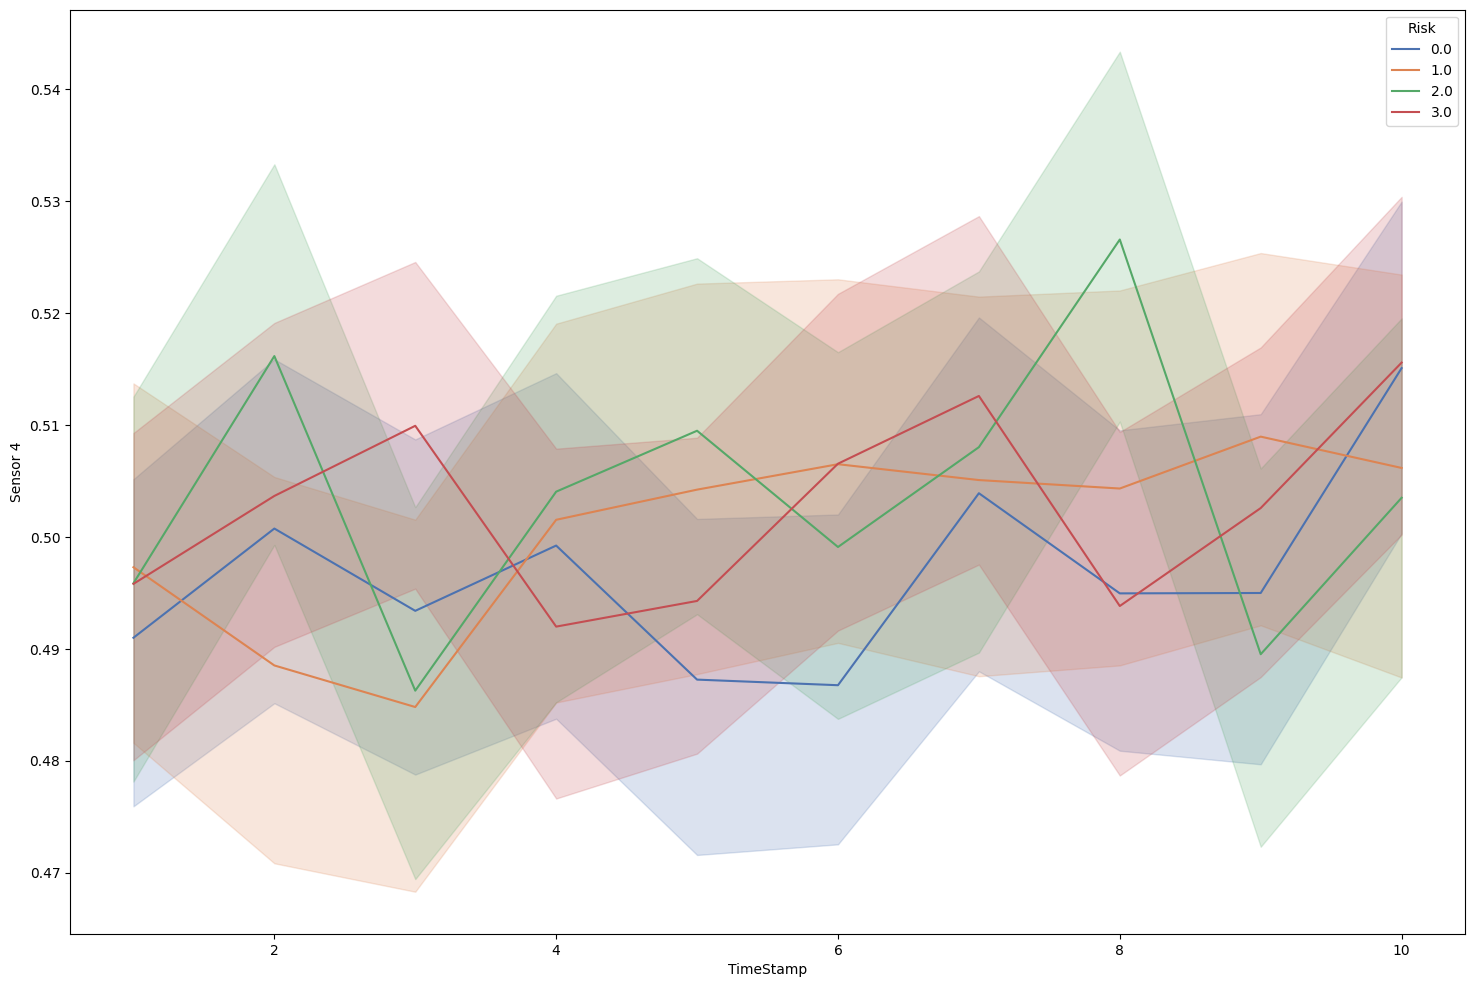

In [41]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 4"], hue=risk_final["Risk"],palette="deep")
plt.show()

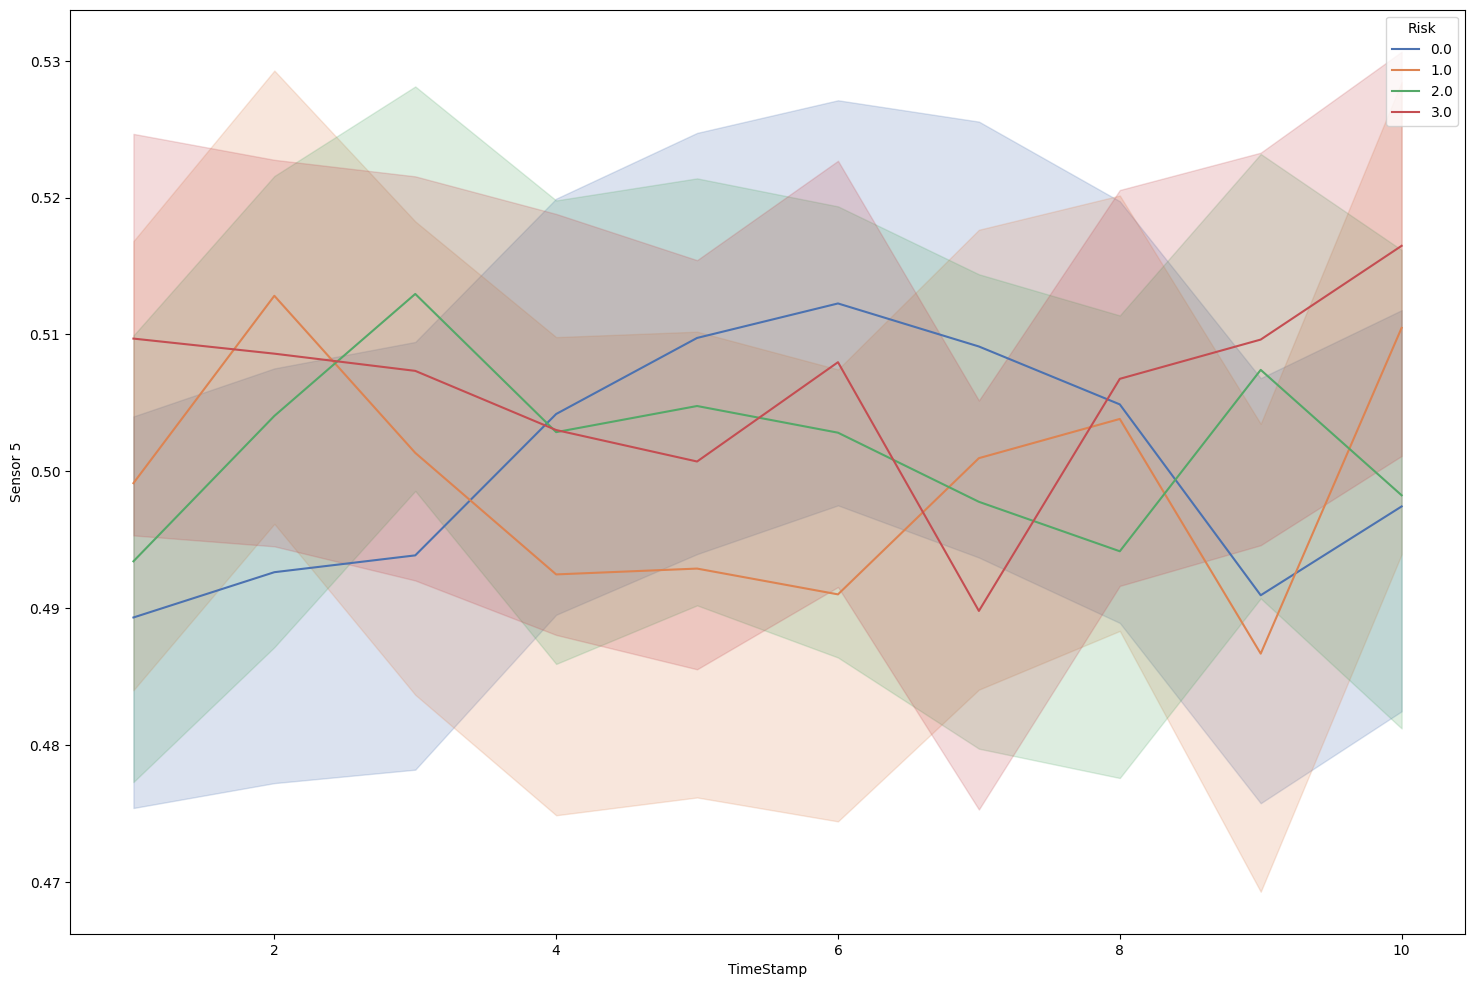

In [42]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 5"], hue=risk_final["Risk"],palette="deep")
plt.show()

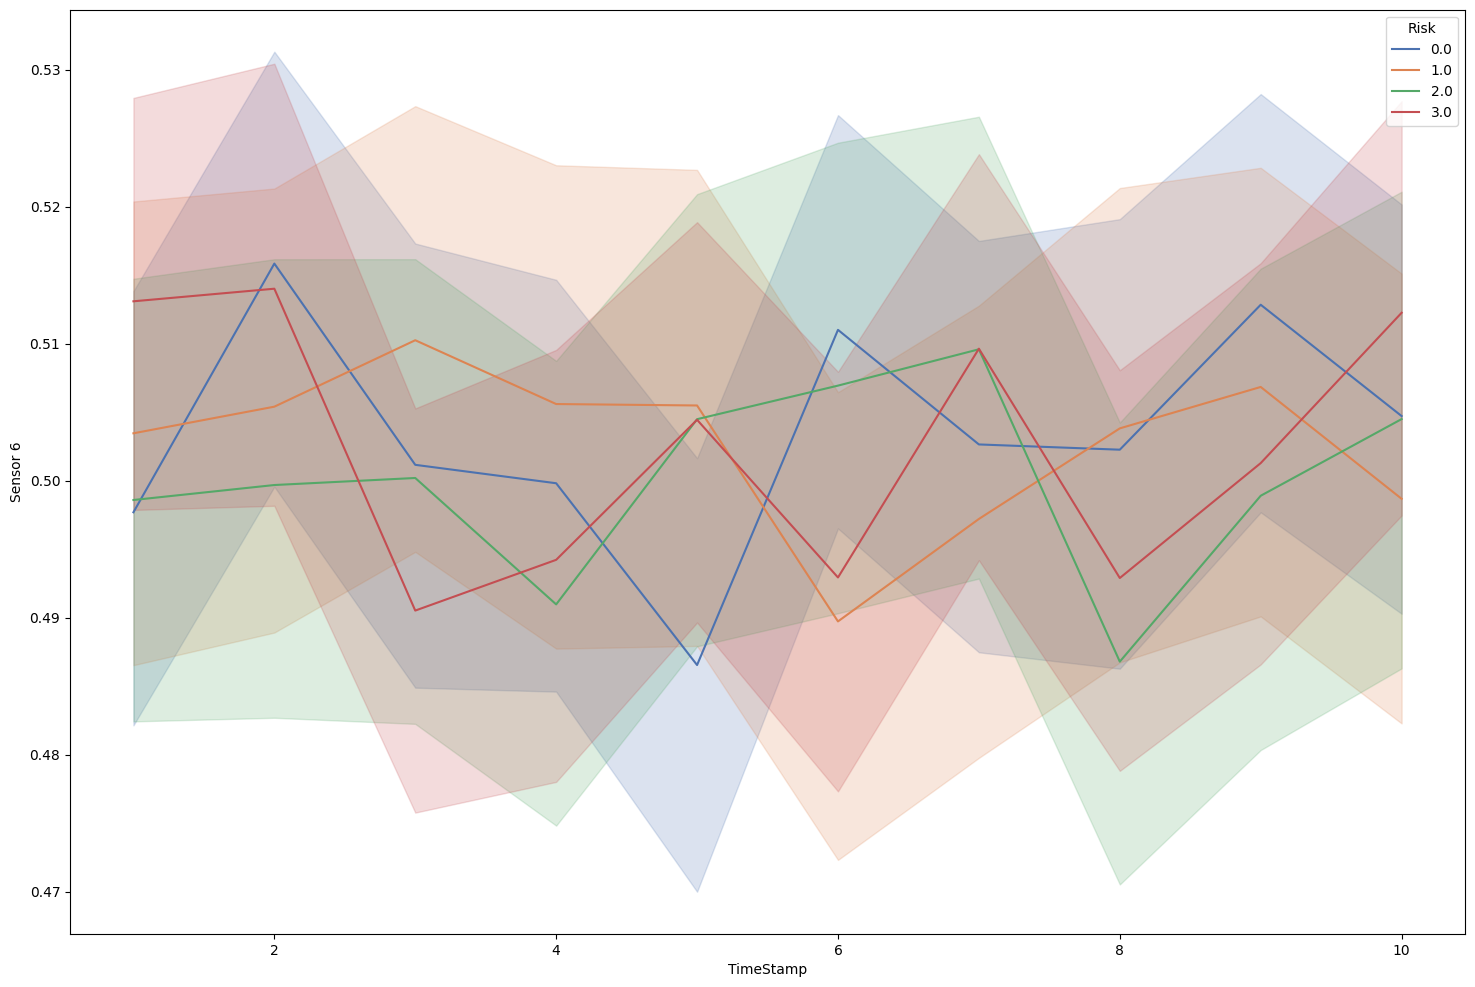

In [43]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 6"], hue=risk_final["Risk"],palette="deep")
plt.show()

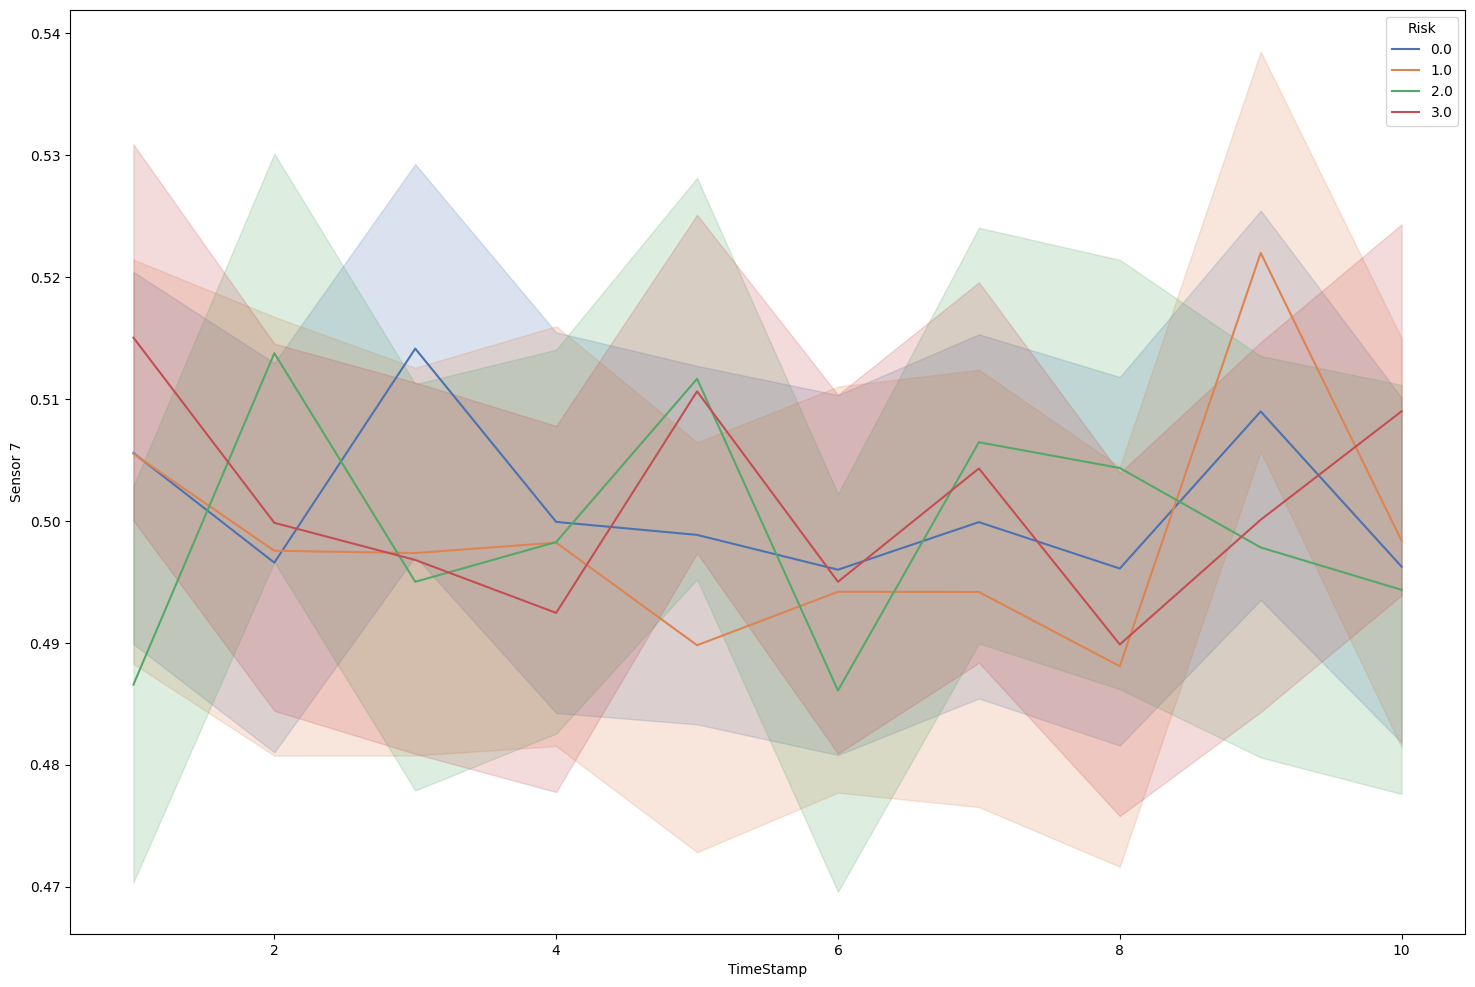

In [44]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 7"], hue=risk_final["Risk"],palette="deep")
plt.show()

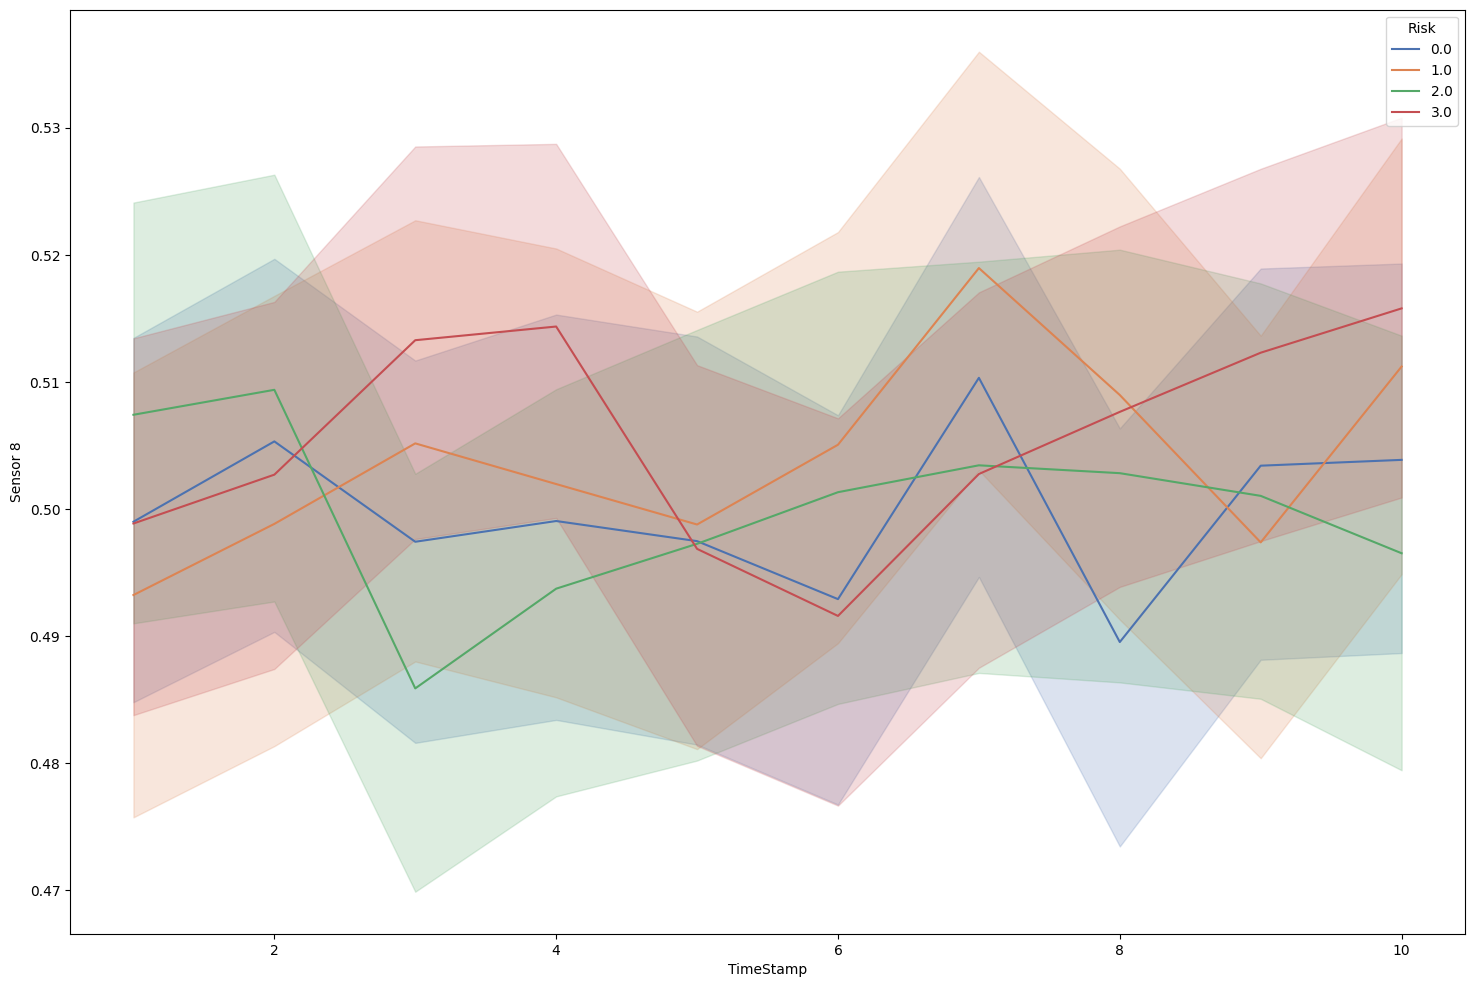

In [45]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 8"], hue=risk_final["Risk"],palette="deep")
plt.show()

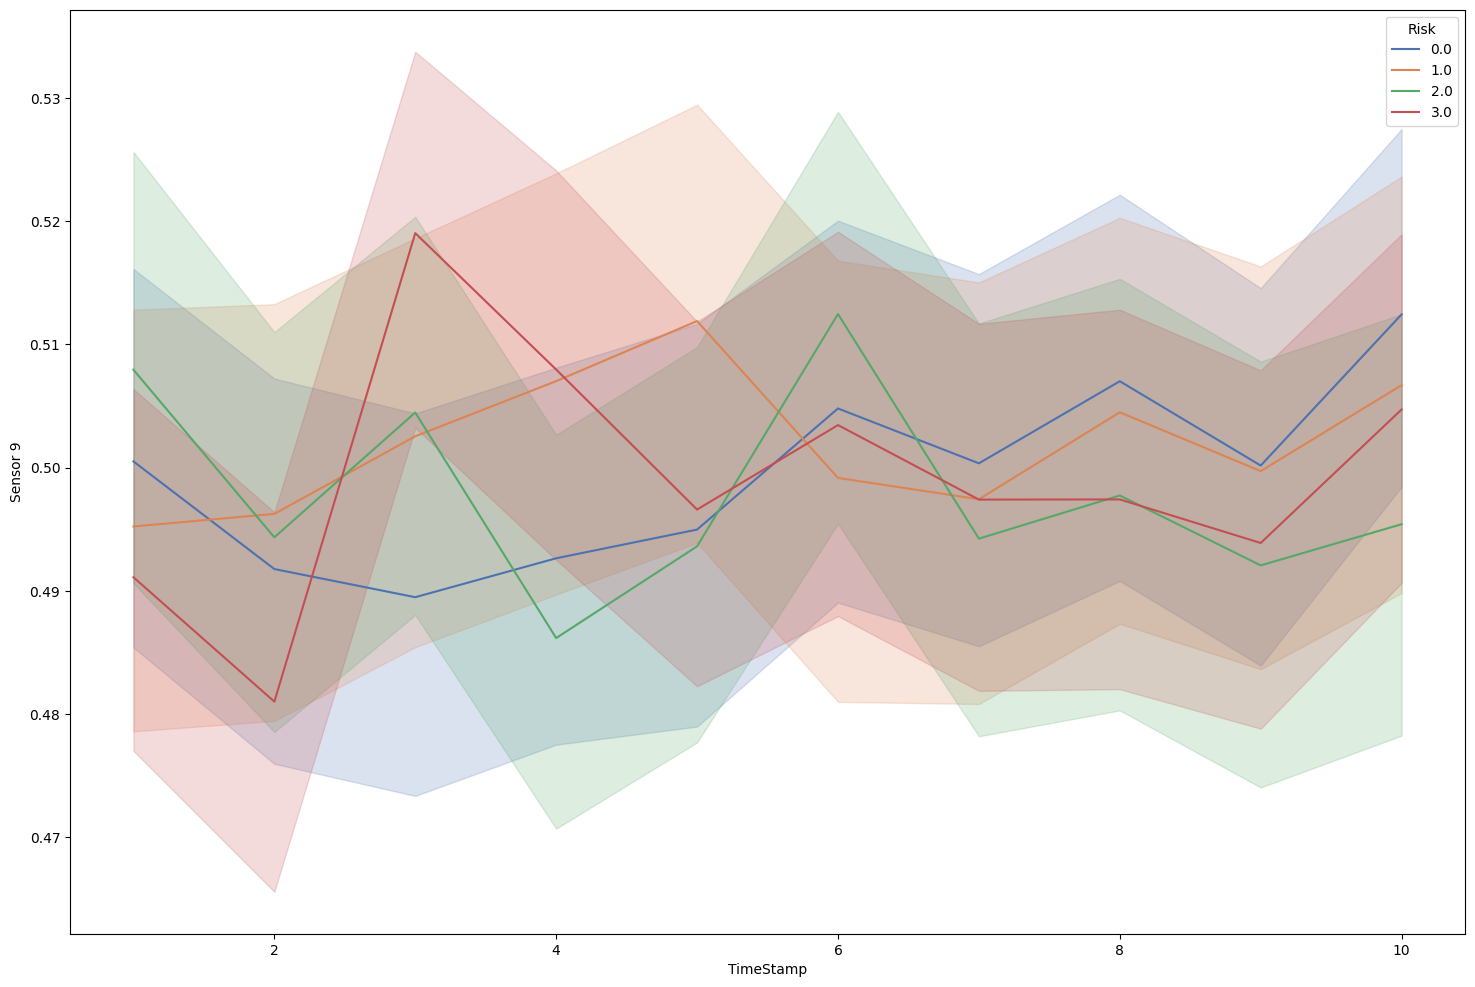

In [46]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 9"], hue=risk_final["Risk"],palette="deep")
plt.show()

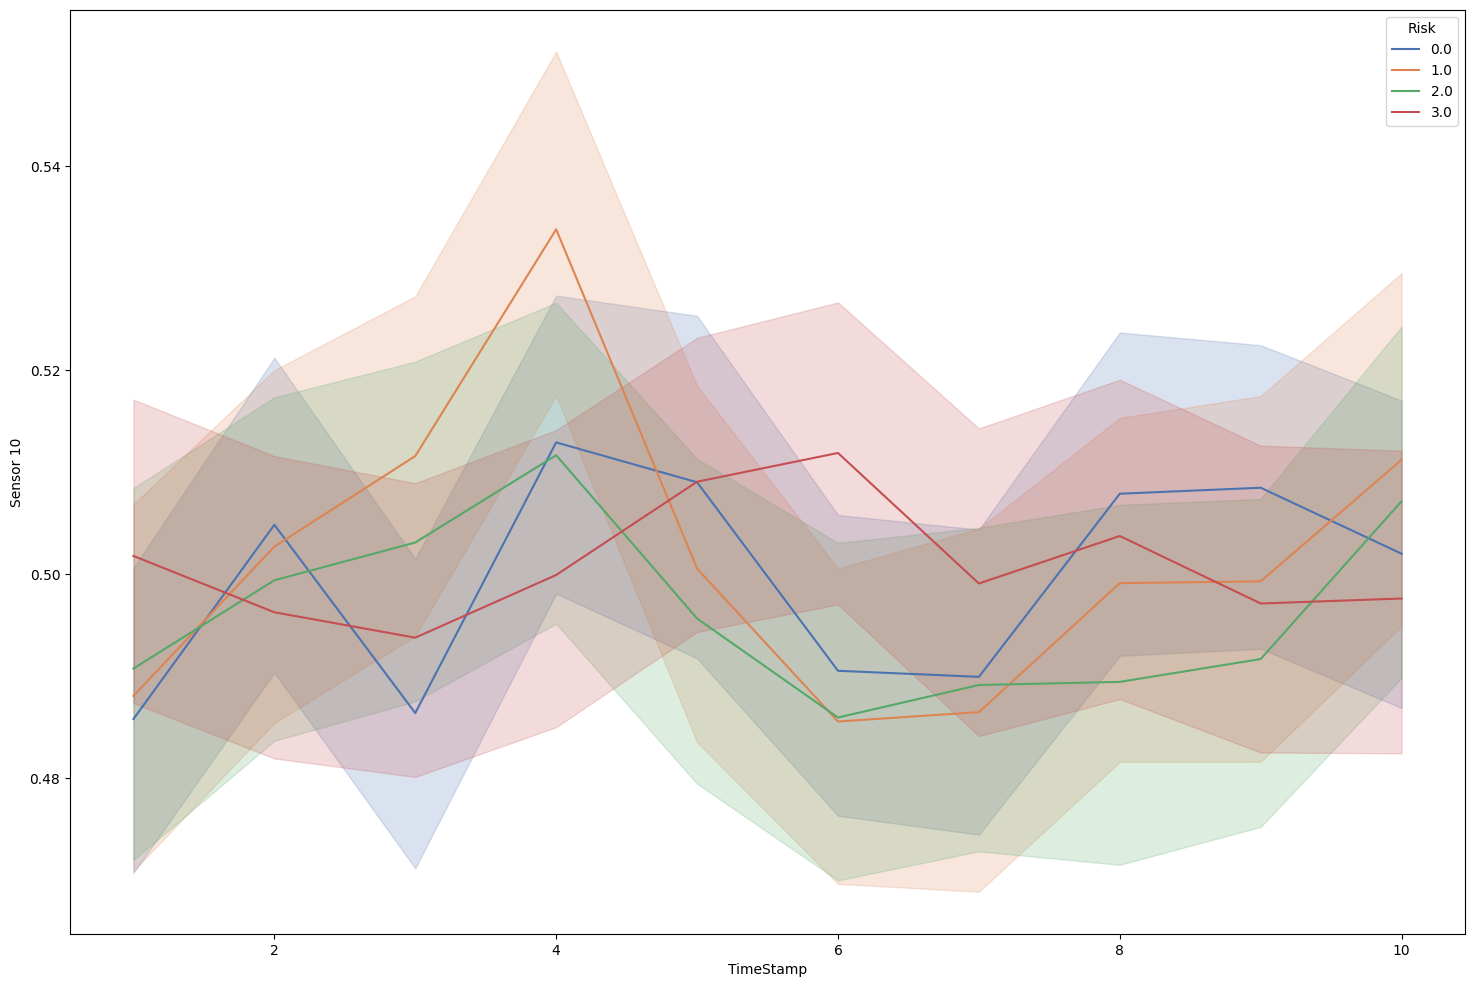

In [47]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 10"], hue=risk_final["Risk"],palette="deep")
plt.show()

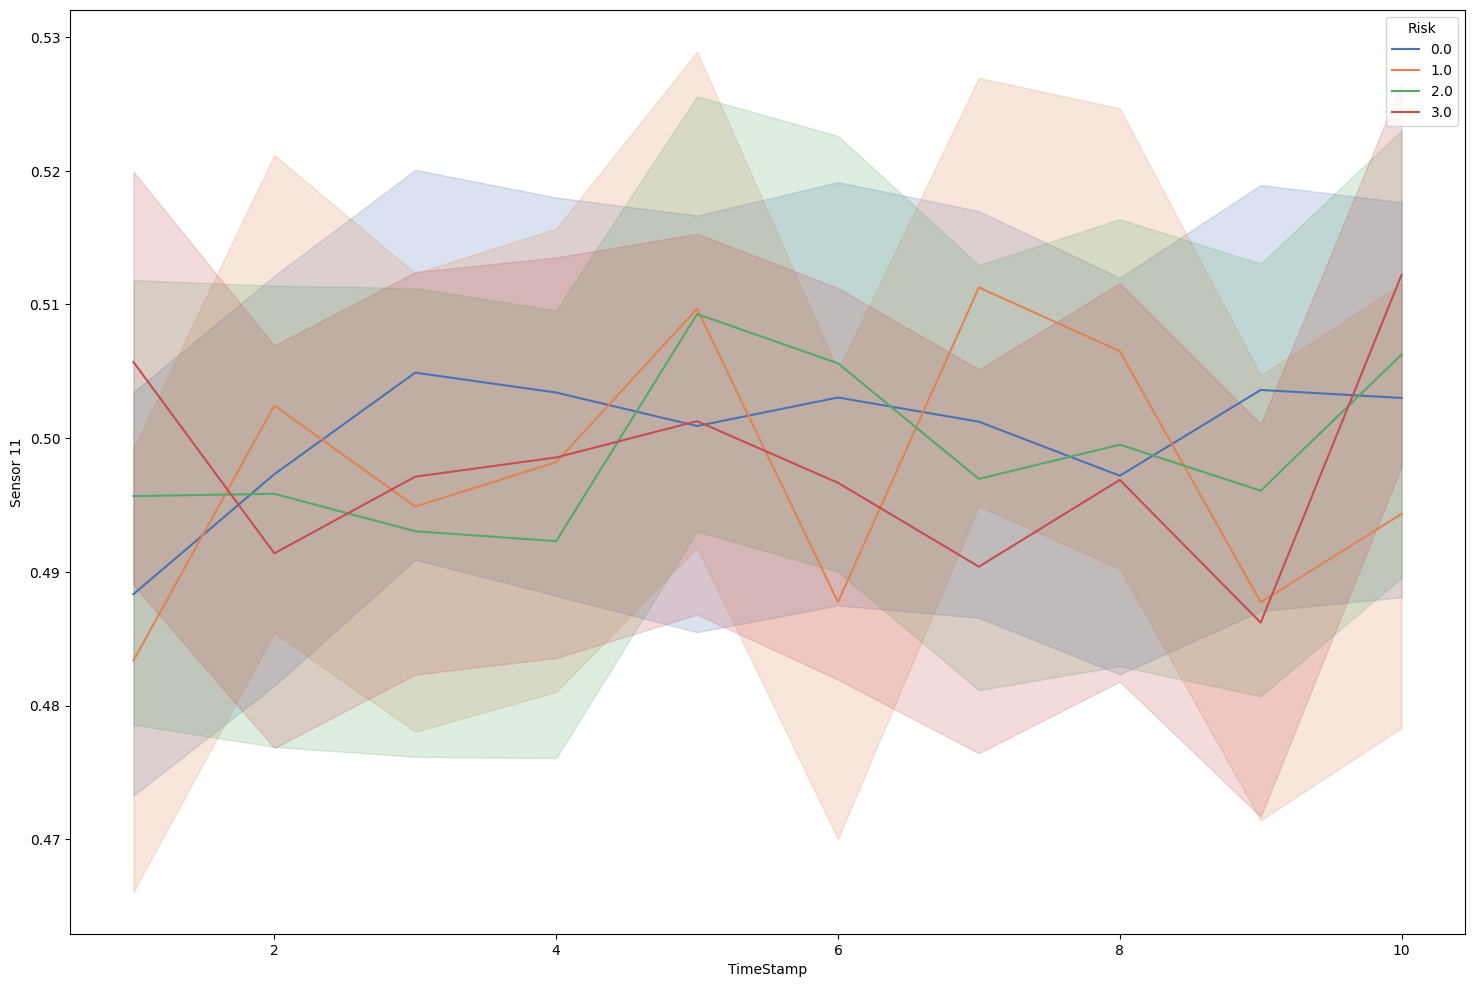

In [48]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 11"], hue=risk_final["Risk"],palette="deep")
plt.show()

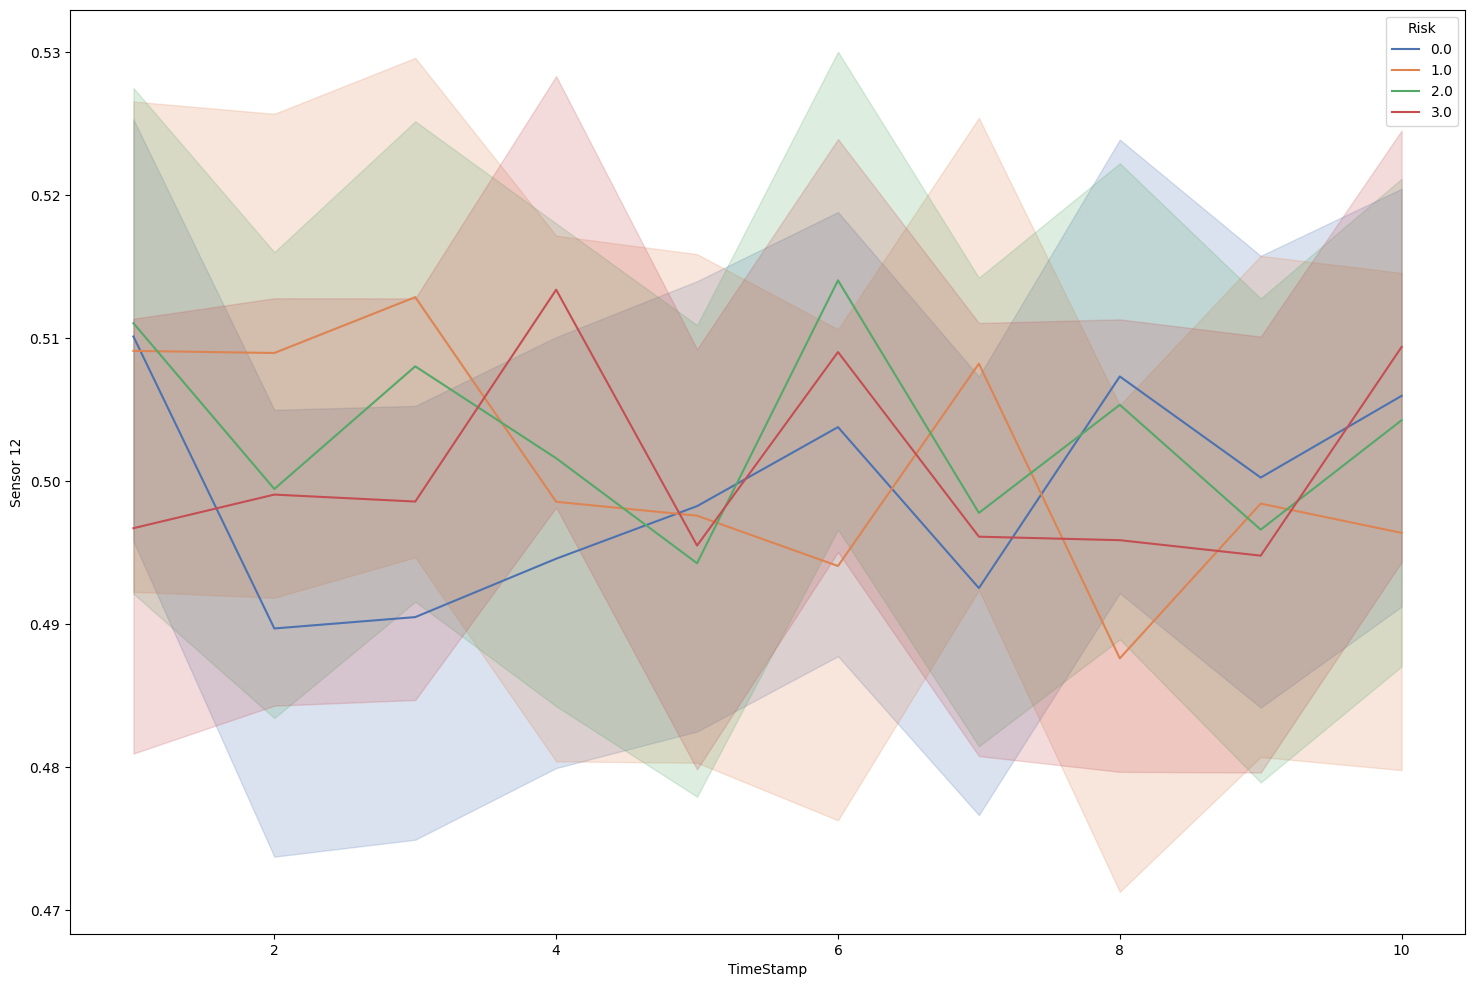

In [49]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 12"], hue=risk_final["Risk"],palette="deep")
plt.show()

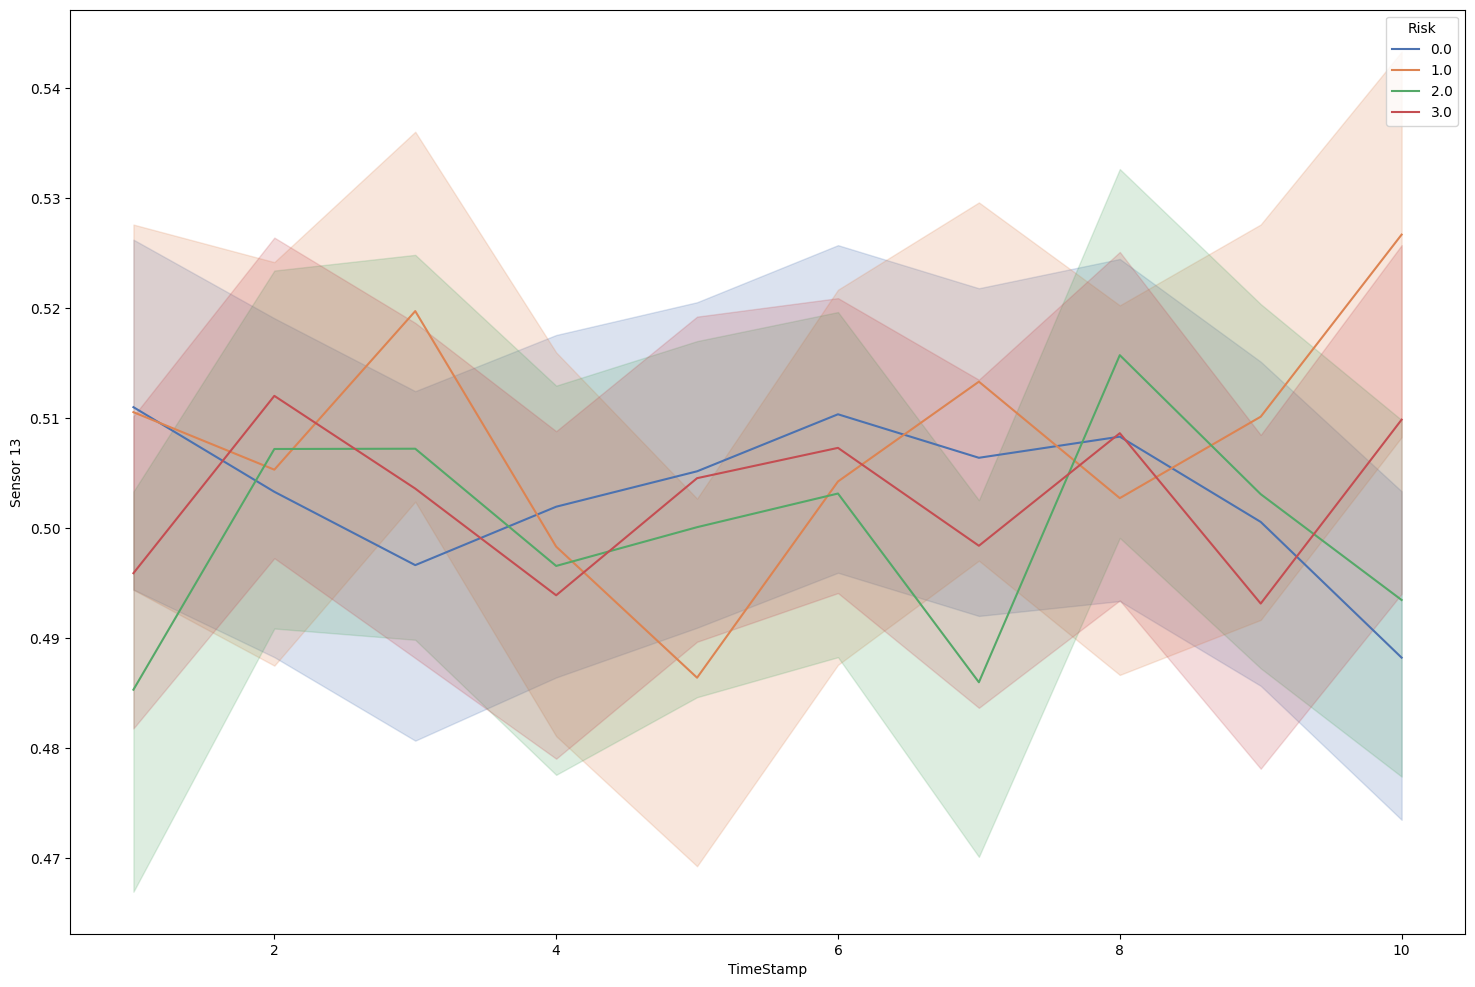

In [50]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 13"], hue=risk_final["Risk"],palette="deep")
plt.show()

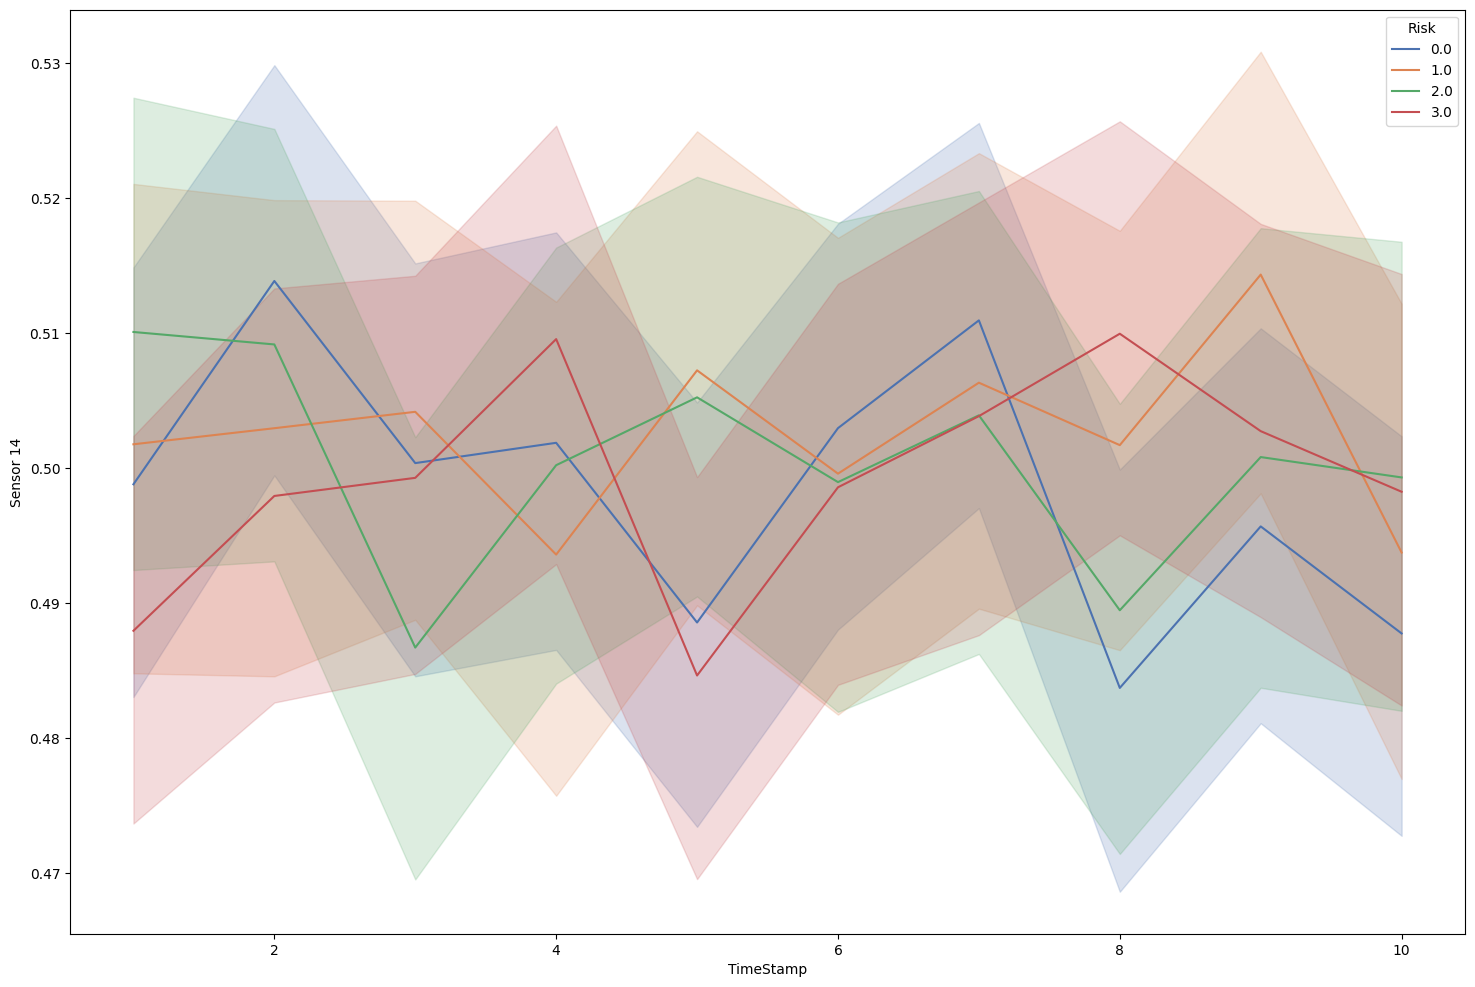

In [51]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 14"], hue=risk_final["Risk"],palette="deep")
plt.show()

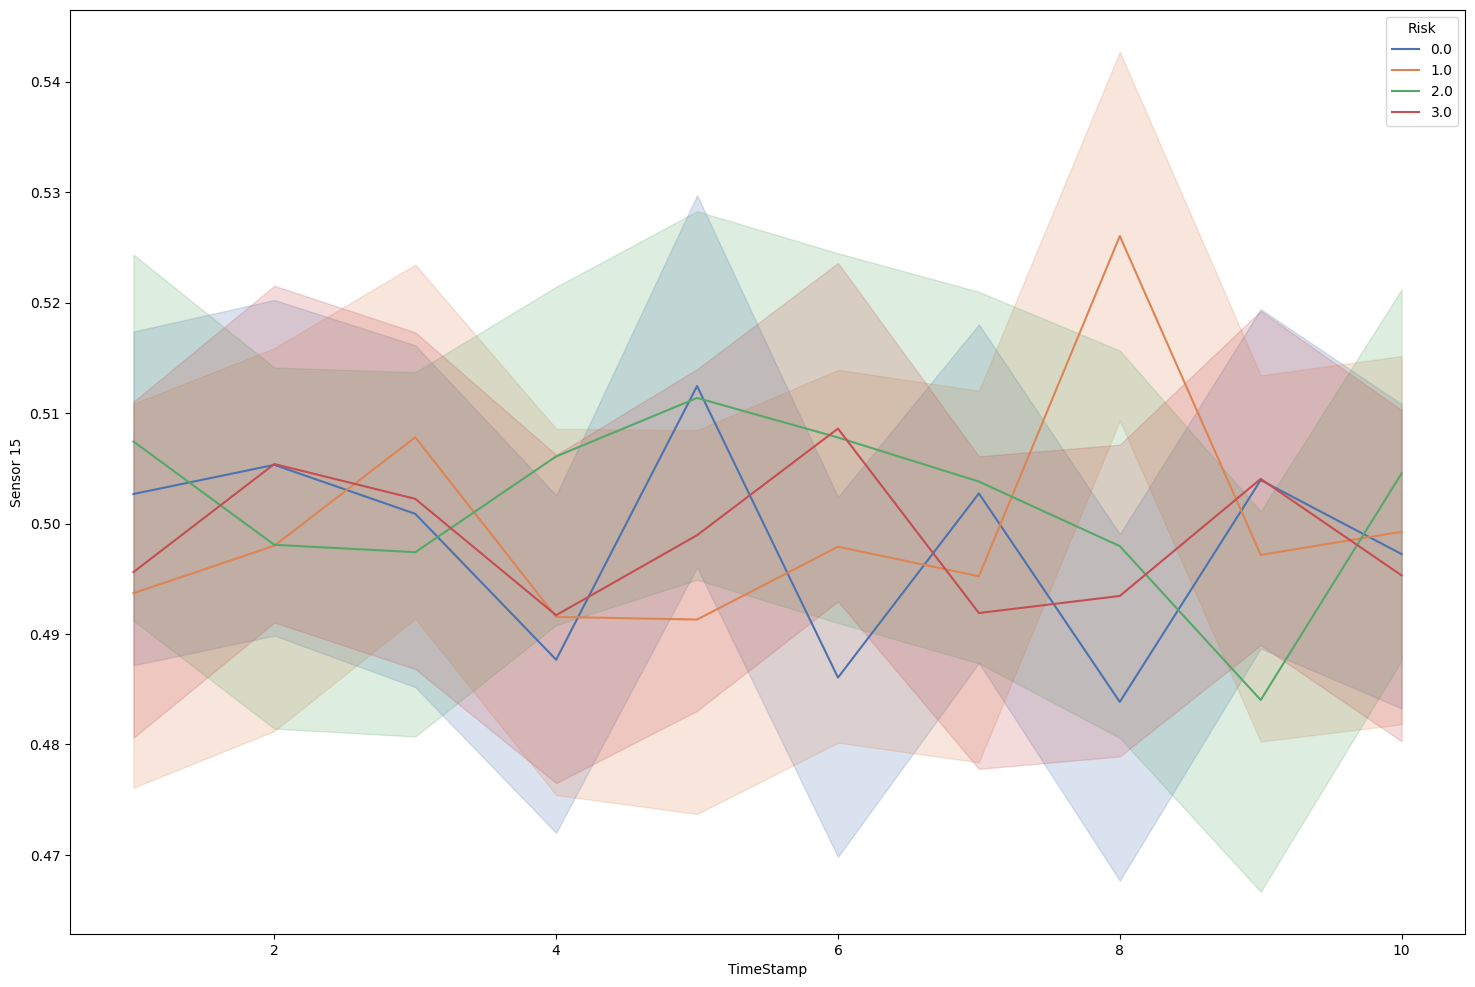

In [52]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 15"], hue=risk_final["Risk"],palette="deep")
plt.show()

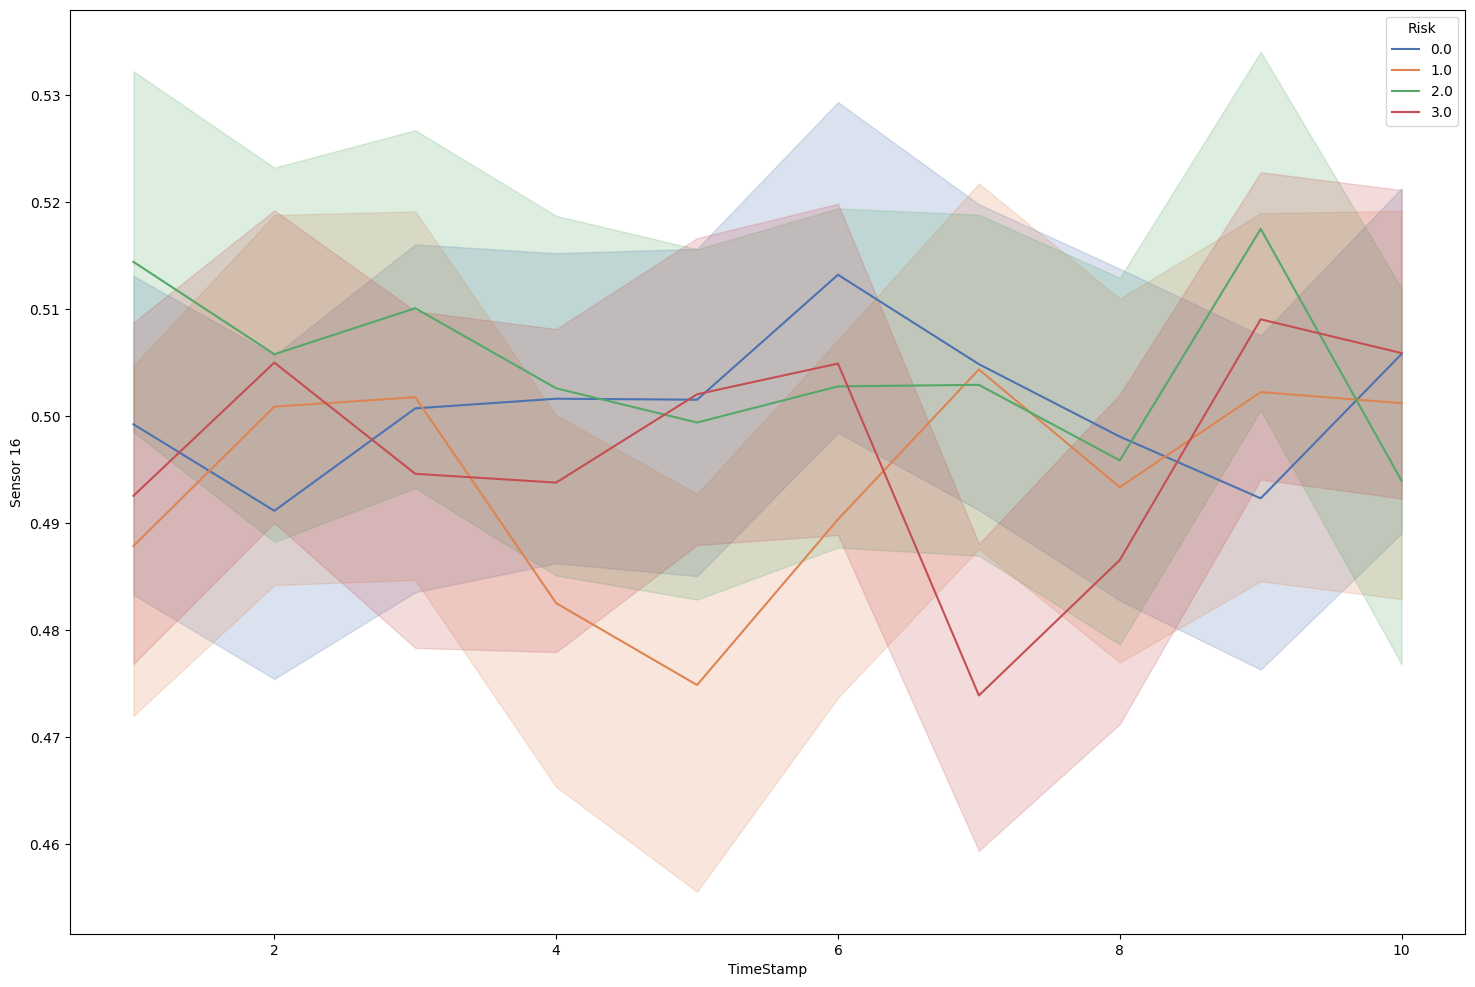

In [53]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 16"], hue=risk_final["Risk"],palette="deep")
plt.show()

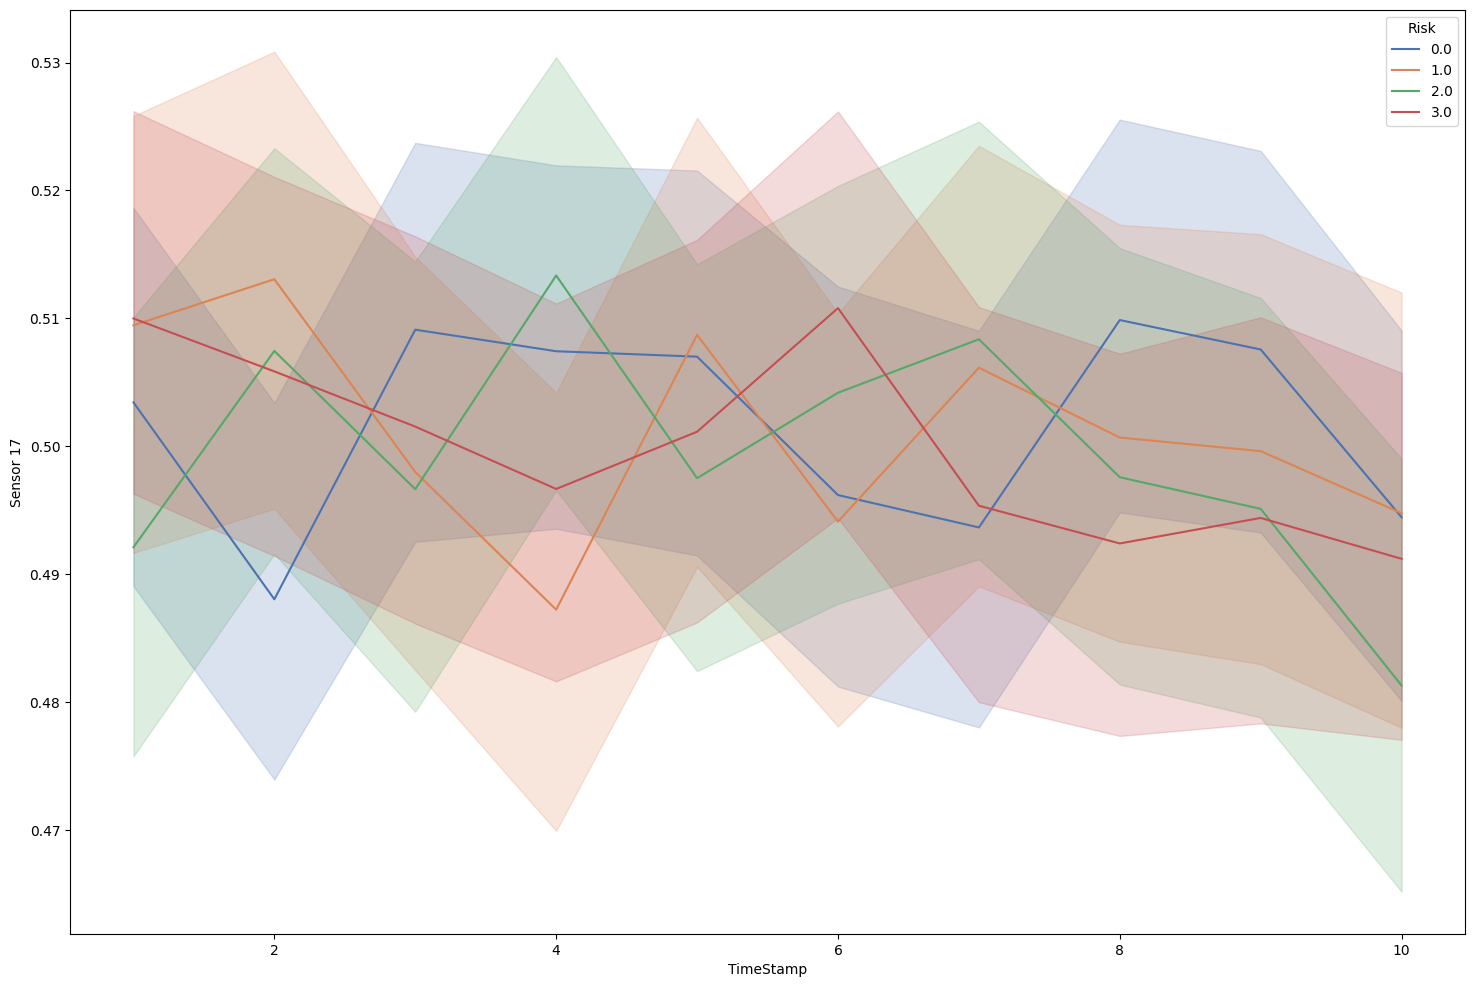

In [54]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 17"], hue=risk_final["Risk"],palette="deep")
plt.show()

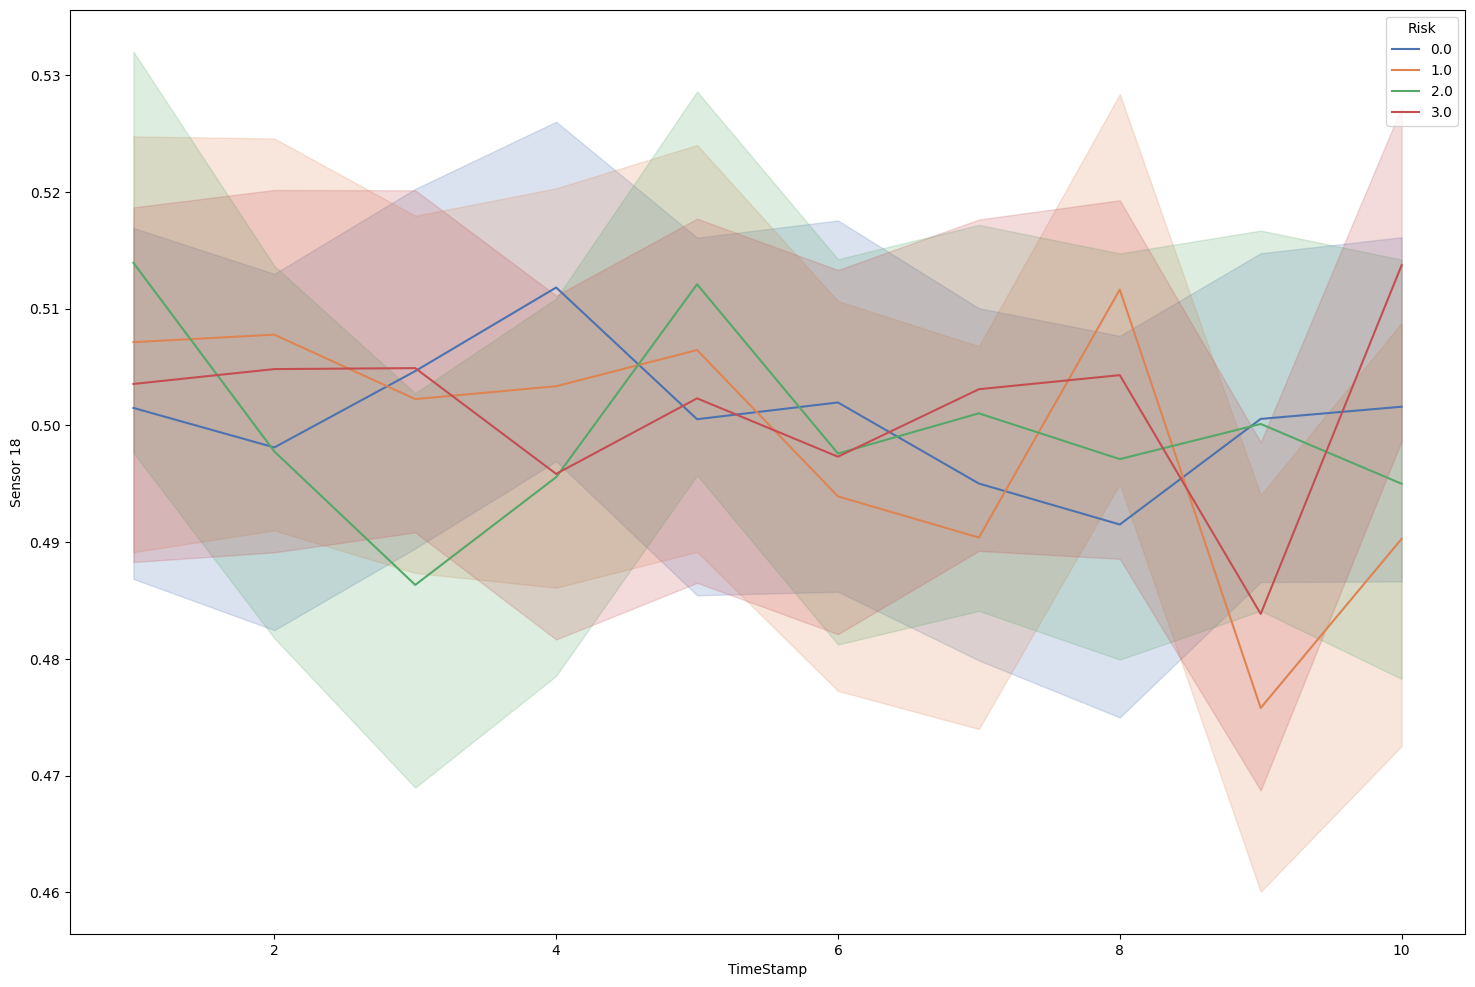

In [55]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 18"], hue=risk_final["Risk"],palette="deep")
plt.show()

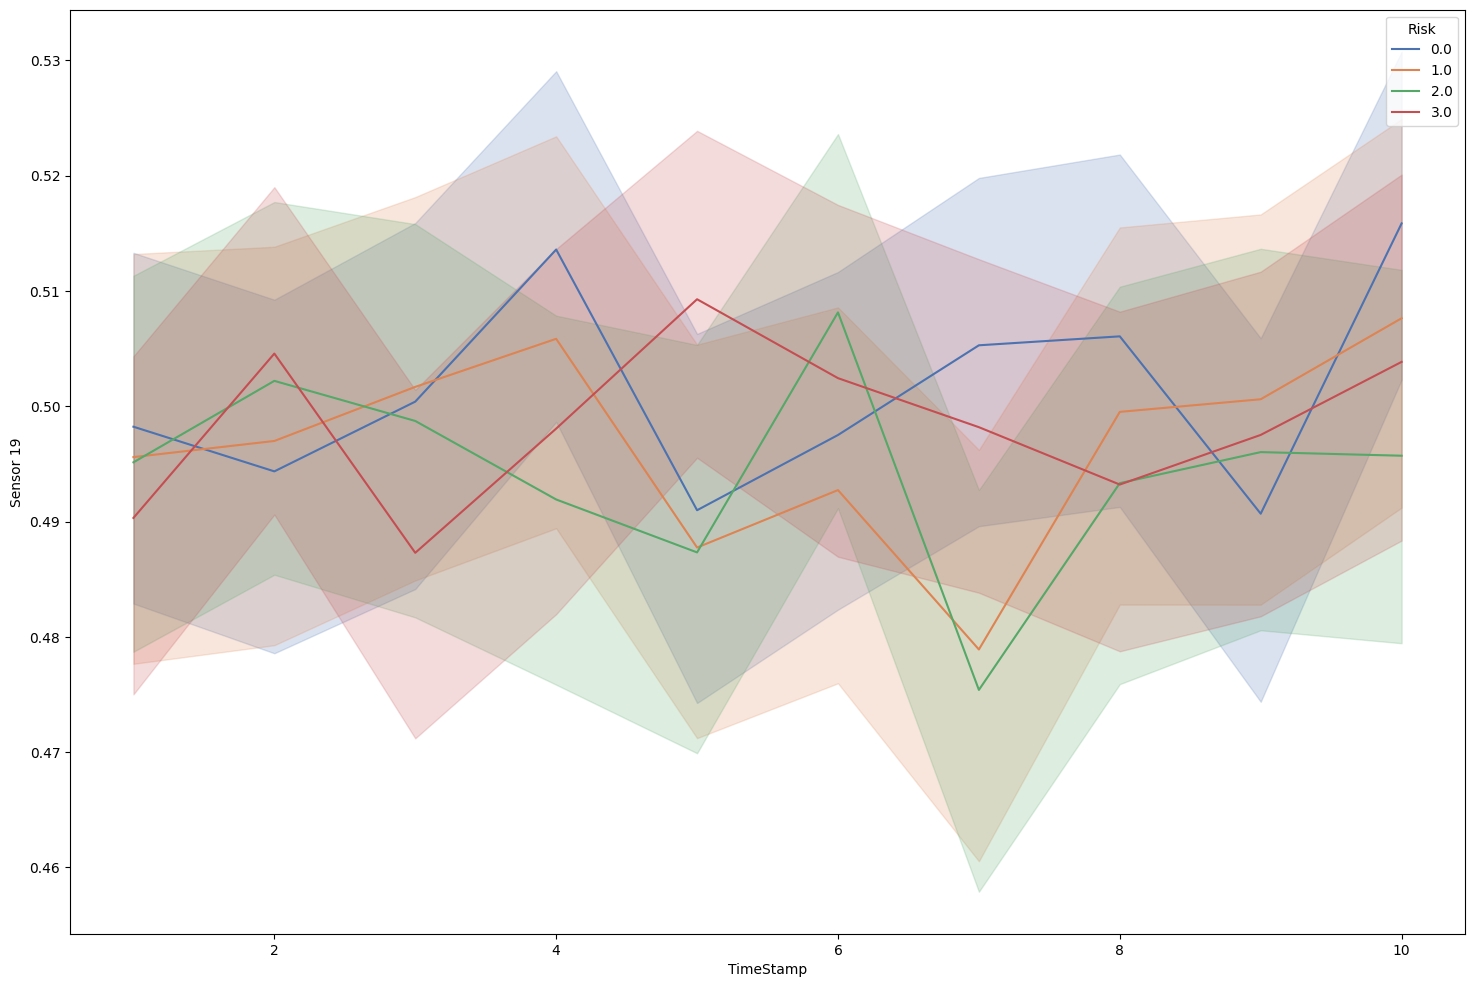

In [56]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 19"], hue=risk_final["Risk"],palette="deep")
plt.show()

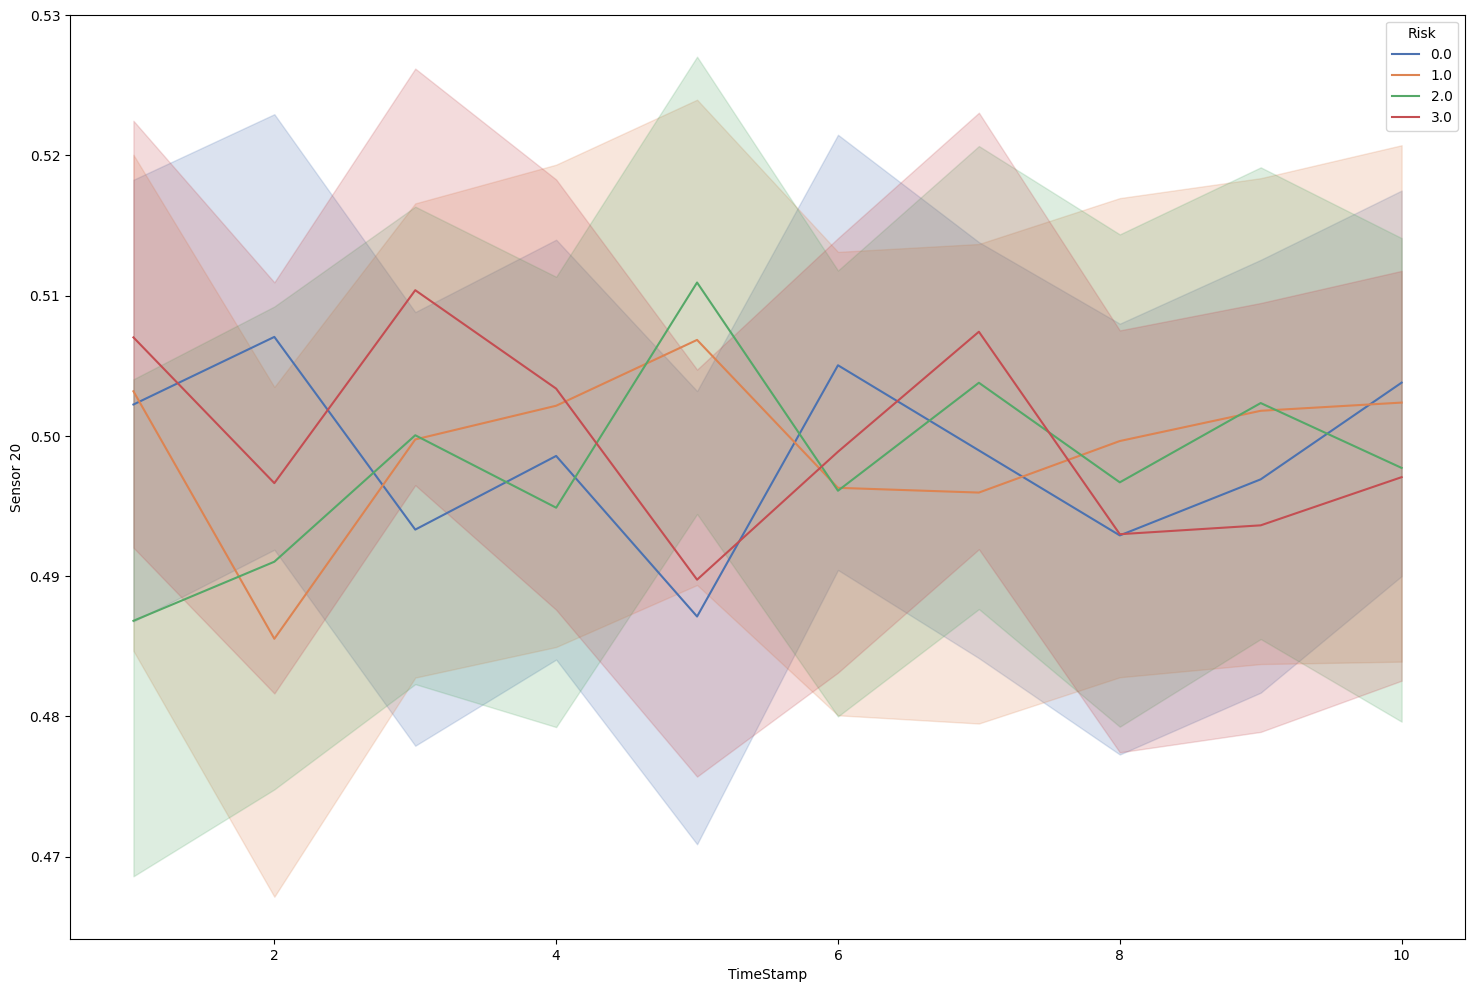

In [57]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 20"], hue=risk_final["Risk"],palette="deep")
plt.show()

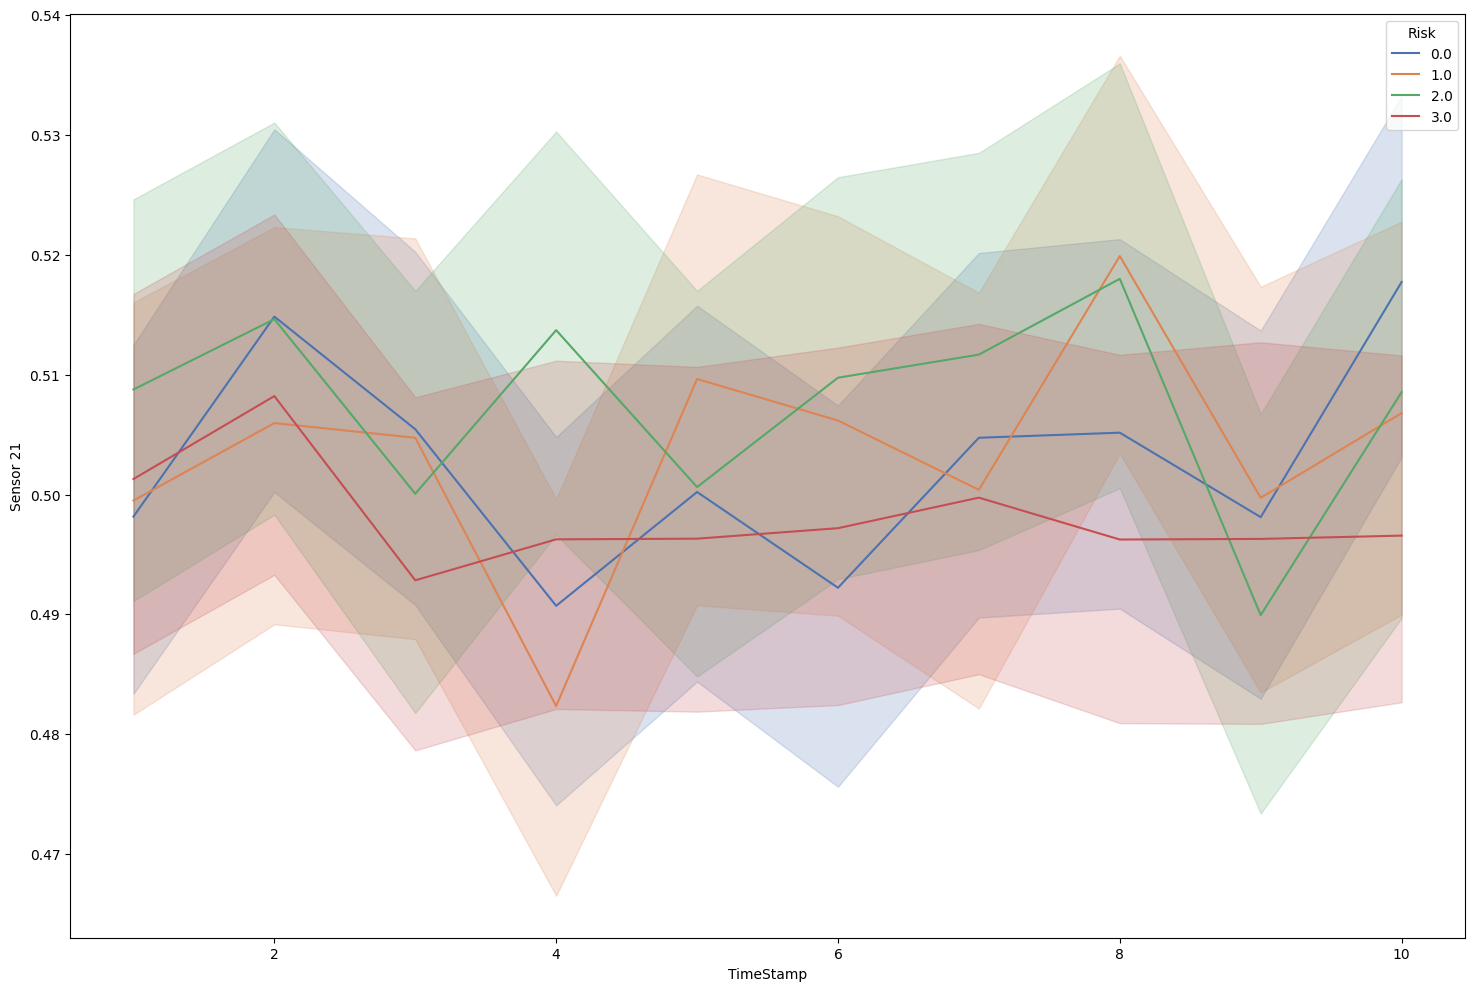

In [58]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 21"], hue=risk_final["Risk"],palette="deep")
plt.show()

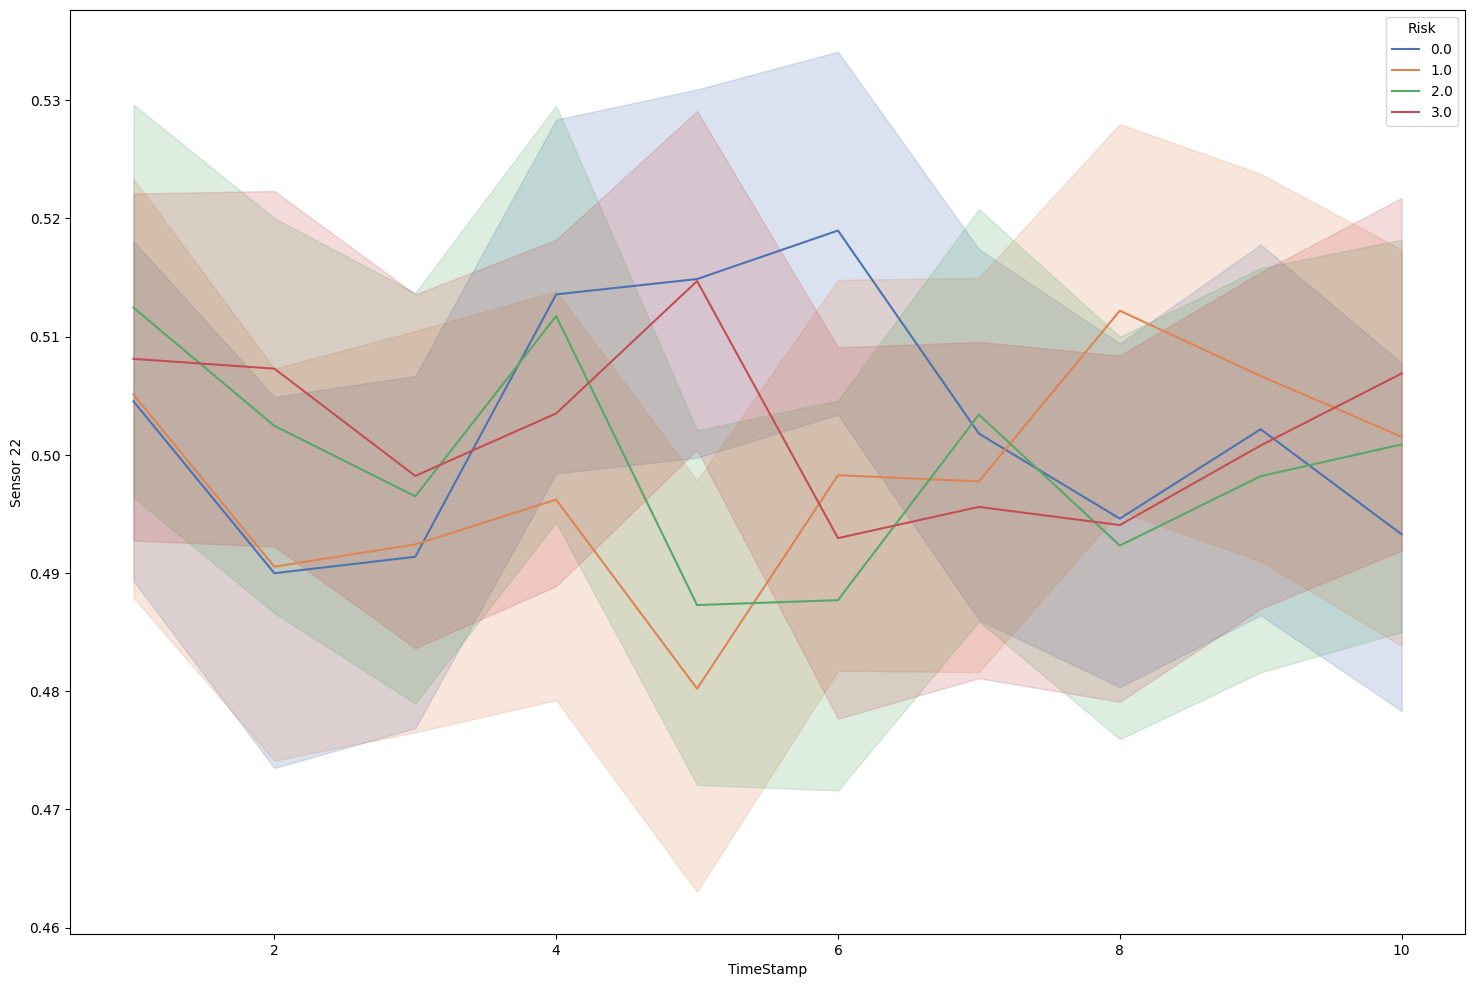

In [59]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 22"], hue=risk_final["Risk"],palette="deep")
plt.show()

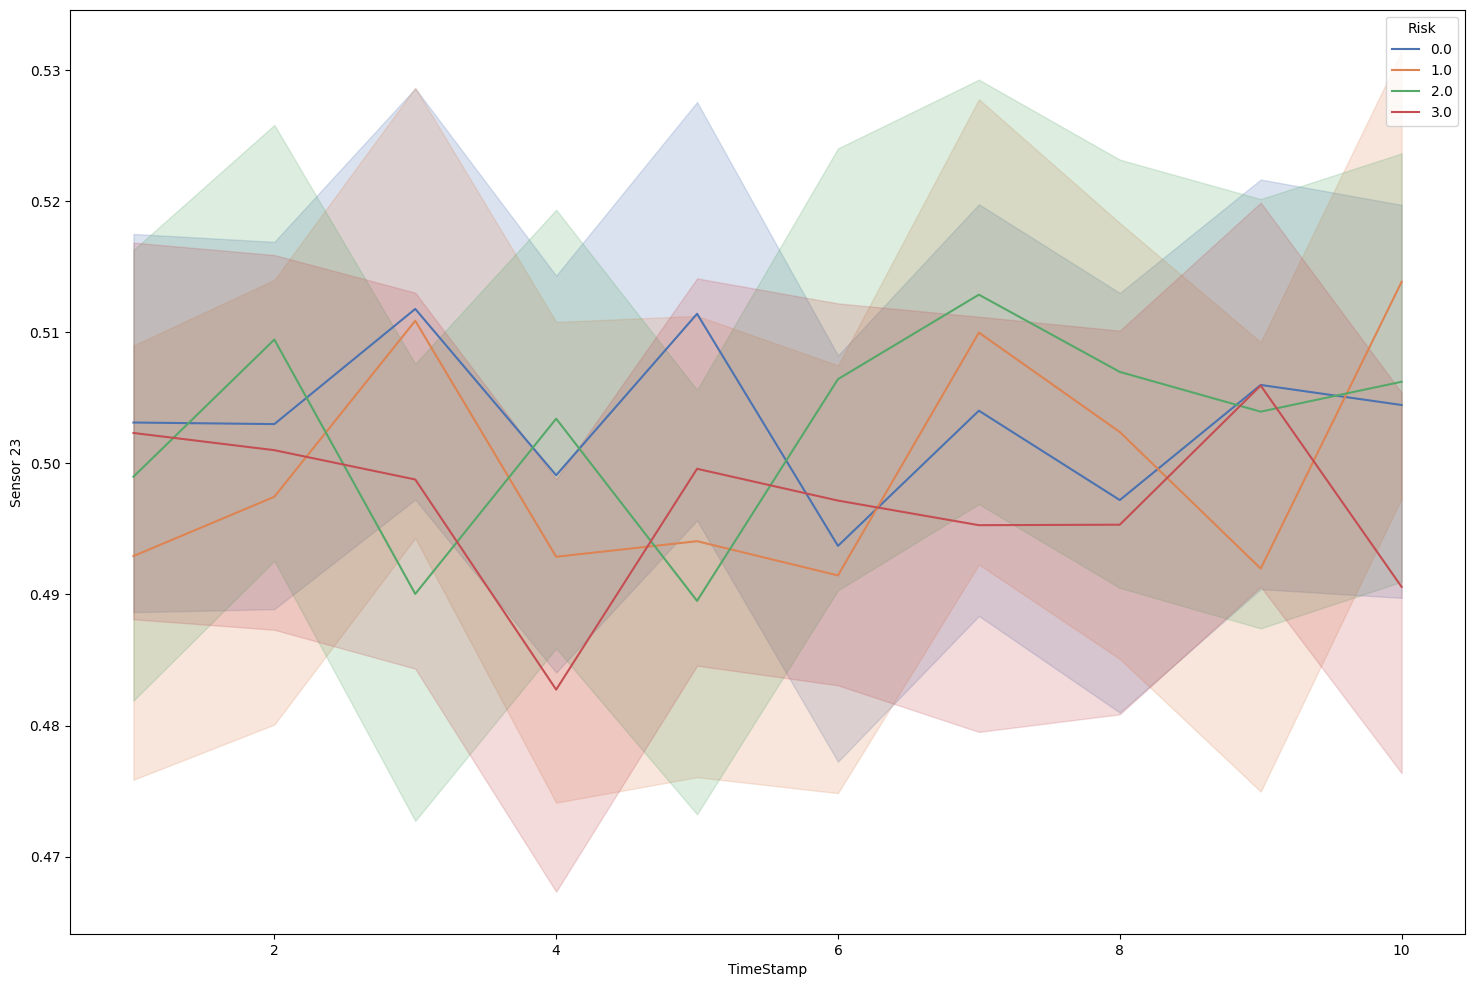

In [60]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 23"], hue=risk_final["Risk"],palette="deep")
plt.show()

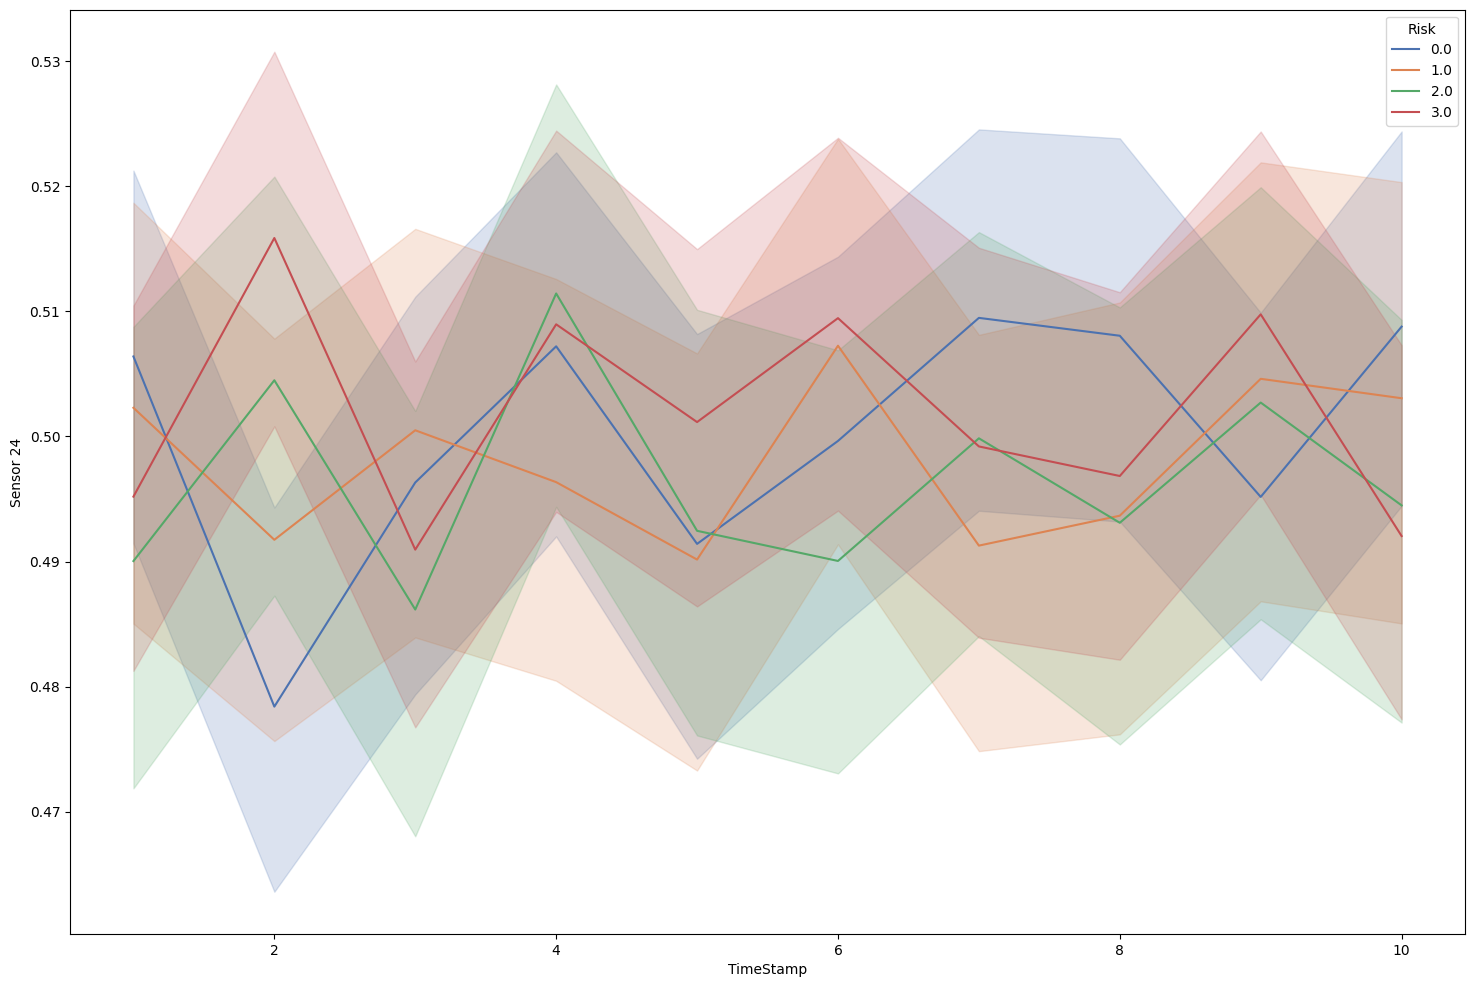

In [61]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 24"], hue=risk_final["Risk"],palette="deep")
plt.show()

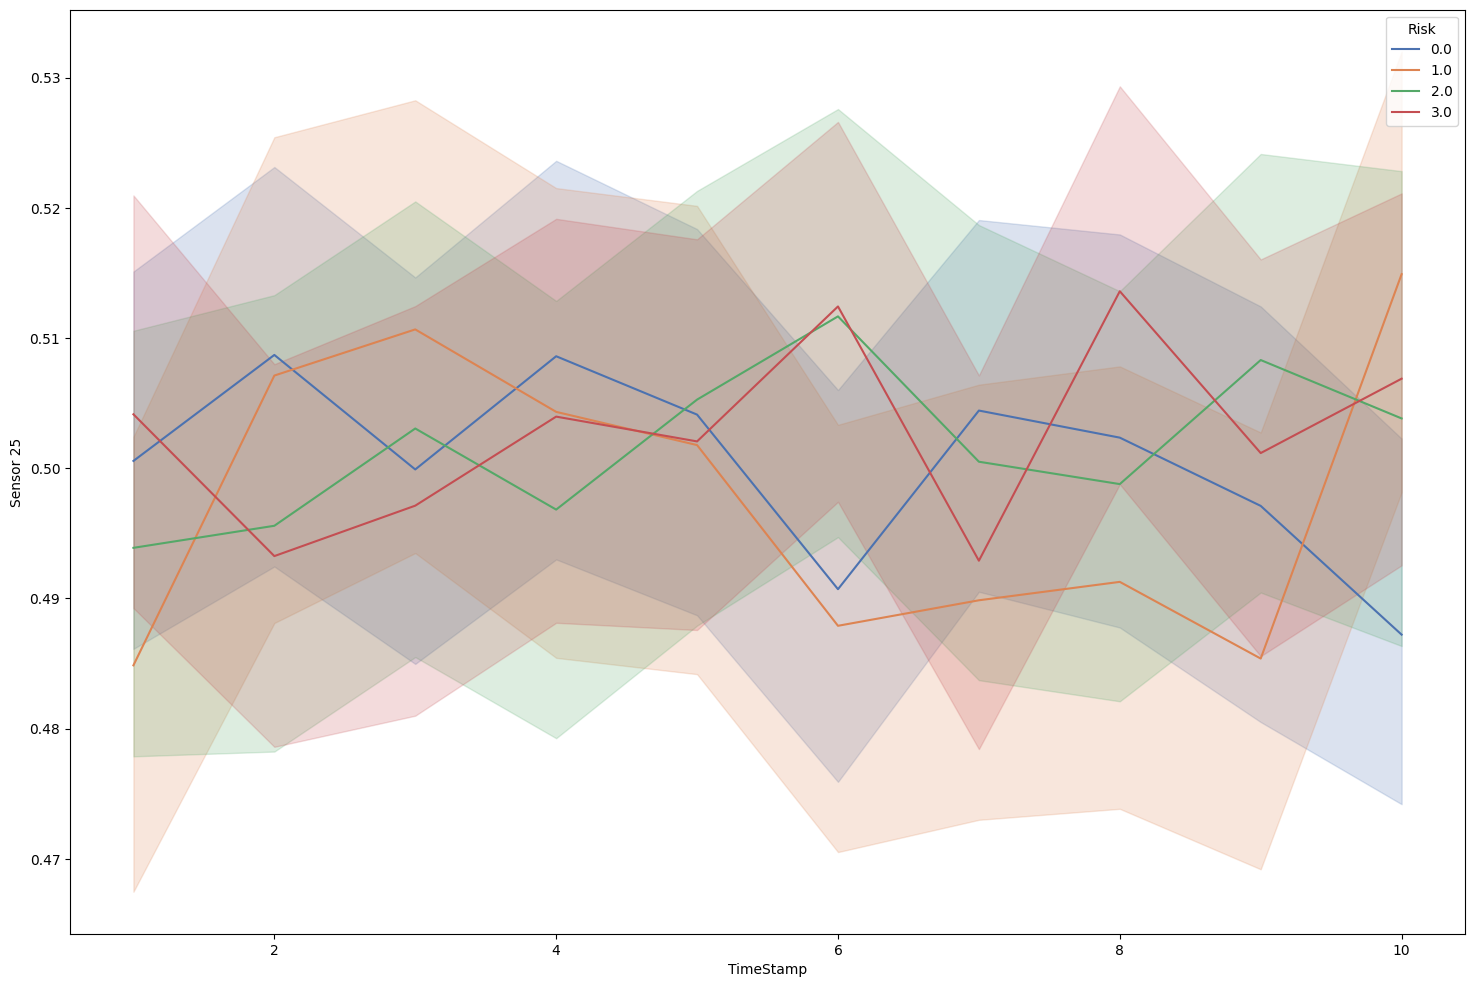

In [62]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 25"], hue=risk_final["Risk"],palette="deep")
plt.show()

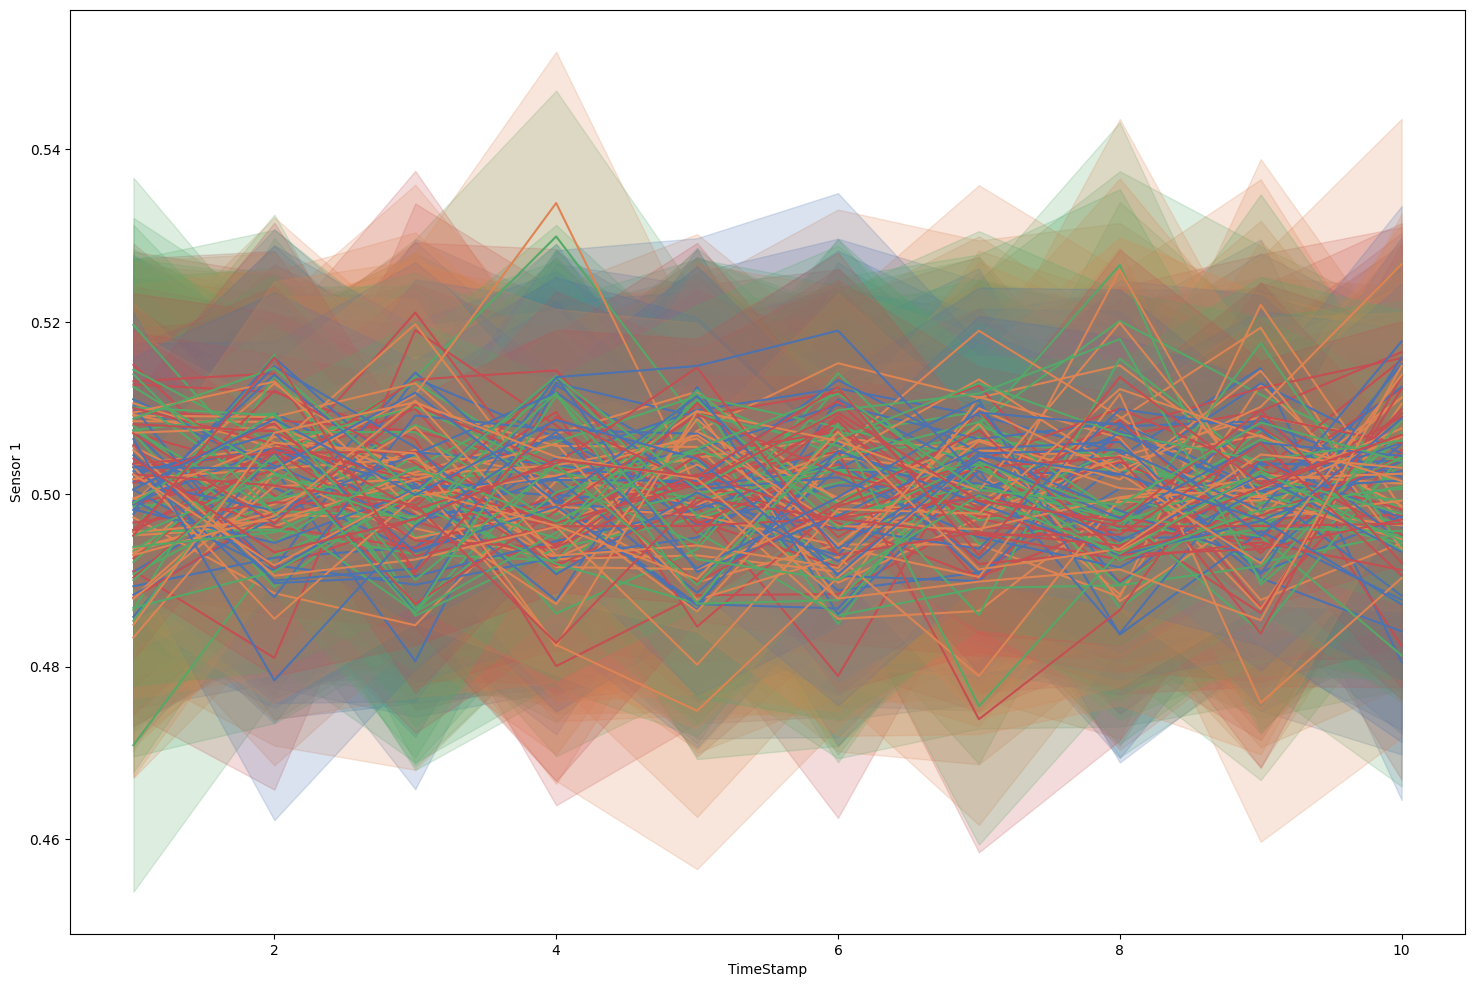

In [63]:
plt.figure(figsize=(18, 12))
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 1"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 2"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 3"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 4"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 5"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 6"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 7"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 8"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 9"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 10"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 11"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 12"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 13"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 14"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 15"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 16"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 17"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 18"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 19"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 20"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 21"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 22"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 23"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 24"], hue=risk_final["Risk"],palette="deep", legend= False)
sns.lineplot(x=repo["TimeStamp"], y=repo["Sensor 25"], hue=risk_final["Risk"],palette="deep", legend= False)
plt.show()

# Flattenining the DATA

In [66]:
repo.head(20)

Unit ID  TimeStamp  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0         0        1.0    0.4337    0.7431    0.9390    0.7541    0.9035   
1         0        2.0    0.7859    0.1925    0.9024    0.8108    0.2016   
2         0        3.0    0.0512    0.9633    0.1423    0.8404    0.6654   
3         0        4.0    0.0413    0.1588    0.1675    0.0971    0.2918   
4         0        5.0    0.7042    0.4724    0.3901    0.2793    0.2522   
5         0        6.0    0.9538    0.3029    0.4227    0.7774    0.5194   
6         0        7.0    0.6729    0.9906    0.8604    0.2969    0.8278   
7         0        8.0    0.3945    0.4753    0.6420    0.9227    0.8885   
8         0        9.0    0.7368    0.8174    0.8750    0.1230    0.3970   
9         0       10.0    0.6752    0.1698    0.6974    0.1273    0.5090   
10        1        1.0    0.4013    0.6779    0.9426    0.3566    0.3919   
11        1        2.0    0.0451    0.9980    0.0685    0.7227    0.6657   
12        1        3.0    0.6802    0.6410    0.1418    0.1385    0.6301   
13        1        4.0    0.9324    0.5326    0.6589    0.2548    0.8256   
14        1        5.0    0.8794    0.9767    0.3466    0.3540    0.2280   
15        1        6.0    0.8832    0.9665    0.7423    0.4511    0.6319   
16        1        7.0    0.7994    0.0085    0.0867    0.2826    0.5555   
17        1        8.0    0.0529    0.1694    0.4128    0.1315    0.9721   
18        1        9.0    0.8480    0.3604    0.8080    0.8181    0.6007   
19        1       10.0    0.3760    0.2622    0.5555    0.2837    0.1444   

    Sensor 6  Sensor 7  Sensor 8  ...  Sensor 16  Sensor 17  Sensor 18  \
0     0.7943    0.2622    0.5901  ...     0.5696     0.6407     0.7027   
1     0.9649    0.2445    0.8934  ...     0.4259     0.7456     0.5750   
2     0.4348    0.5751    0.8067  ...     0.4753     0.5449     0.8531   
3     0.1970    0.0971    0.2039  ...     0.7959     0.5306     0.3109   
4     0.1933    0.2694    0.4110  ...     0.2474     0.5711     0.5686   
5     0.7531    0.4816    0.9918  ...     0.2433     0.2040     0.1013   
6     0.4840    0.2507    0.0795  ...     0.1682     0.7322     0.9347   
7     0.1002    0.5443    0.8279  ...     0.0176     0.2317     0.8063   
8     0.7676    0.5175    0.8211  ...     0.7746     0.0908     0.7100   
9     0.3354    0.8128    0.2753  ...     0.7912     0.1517     0.6923   
10    0.0981    0.9805    0.5617  ...     0.7539     0.9158     0.1142   
11    0.2293    0.1240    0.2924  ...     0.5176     0.1631     0.0425   
12    0.7111    0.1836    0.5769  ...     0.4084     0.1680     0.2971   
13    0.8534    0.9350    0.4666  ...     0.0099     0.8650     0.3412   
14    0.8646    0.2864    0.7606  ...     0.3962     0.0471     0.8735   
15    0.8042    0.2793    0.6086  ...     0.3586     0.0811     0.7620   
16    0.5340    0.1658    0.4708  ...     0.4270     0.3943     0.0931   
17    0.9899    0.8796    0.9293  ...     0.7912     0.9558     0.7626   
18    0.0921    0.8710    0.7188  ...     0.9931     0.0538     0.9773   
19    0.7606    0.1316    0.5048  ...     0.7720     0.4128     0.4043   

    Sensor 19  Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  \
0      0.7163     0.9954     0.8303     0.1641     0.7893     0.7533   
1      0.7947     0.4663     0.4303     0.3643     0.0558     0.1330   
2      0.6337     0.8807     0.2560     0.0597     0.5751     0.7797   
3      0.2726     0.3298     0.4658     0.7479     0.8747     0.2677   
4      0.6575     0.1447     0.5774     0.4022     0.6753     0.8371   
5      0.6044     0.9570     0.8958     0.8006     0.5282     0.4132   
6      0.0961     0.2847     0.4782     0.2882     0.4375     0.5795   
7      0.4249     0.7711     0.4558     0.5419     0.4521     0.3392   
8      0.7641     0.7748     0.9589     0.7818     0.9553     0.7653   
9      0.7245     0.6380     0.0089     0.4479     0.6776     0.7189   
10     0.1561     0.3578     0.3480     0.9472     0.4583   

In [71]:
repo_flatT2=pd.DataFrame()

# indices_to_access = list(range(9, 500000, 10))
# selected_values_array = repo['Sensor 1'].iloc[indices_to_access].to_numpy()
# repo_flatT2["S1T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 2'].iloc[indices_to_access].to_numpy()
repo_flatT2["S2T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 3'].iloc[indices_to_access].to_numpy()
repo_flatT2["S3T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 4'].iloc[indices_to_access].to_numpy()
repo_flatT2["S4T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 5'].iloc[indices_to_access].to_numpy()
repo_flatT2["S5T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 6'].iloc[indices_to_access].to_numpy()
repo_flatT2["S6T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 7'].iloc[indices_to_access].to_numpy()
repo_flatT2["S7T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 8'].iloc[indices_to_access].to_numpy()
repo_flatT2["S8T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 9'].iloc[indices_to_access].to_numpy()
repo_flatT2["S9T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 10'].iloc[indices_to_access].to_numpy()
repo_flatT2["S10T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 11'].iloc[indices_to_access].to_numpy()
repo_flatT2["S11T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 12'].iloc[indices_to_access].to_numpy()
repo_flatT2["S12T2"]=selected_values_array

# indices_to_access = list(range(9, 500000, 10))
# selected_values_array = repo['Sensor 13'].iloc[indices_to_access].to_numpy()
# repo_flatT2["S13T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 14'].iloc[indices_to_access].to_numpy()
repo_flatT2["S14T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 15'].iloc[indices_to_access].to_numpy()
repo_flatT2["S15T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 10'].iloc[indices_to_access].to_numpy()
repo_flatT2["S10T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 16'].iloc[indices_to_access].to_numpy()
repo_flatT2["S16T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 17'].iloc[indices_to_access].to_numpy()
repo_flatT2["S17T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 18'].iloc[indices_to_access].to_numpy()
repo_flatT2["S18T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 19'].iloc[indices_to_access].to_numpy()
repo_flatT2["S19T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 20'].iloc[indices_to_access].to_numpy()
repo_flatT2["S20T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 21'].iloc[indices_to_access].to_numpy()
repo_flatT2["S21T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 22'].iloc[indices_to_access].to_numpy()
repo_flatT2["S22T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 23'].iloc[indices_to_access].to_numpy()
repo_flatT2["S23T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 24'].iloc[indices_to_access].to_numpy()
repo_flatT2["S24T2"]=selected_values_array

indices_to_access = list(range(9, 500000, 10))
selected_values_array = repo['Sensor 25'].iloc[indices_to_access].to_numpy()
repo_flatT2["S25T2"]=selected_values_array

In [217]:
repo_flatT2

S2T2    S3T2    S4T2    S5T2    S6T2    S7T2    S8T2    S9T2   S10T2  \
0      0.1698  0.6974  0.1273  0.5090  0.3354  0.8128  0.2753  0.1591  0.9358   
1      0.2622  0.5555  0.2837  0.1444  0.7606  0.1316  0.5048  0.5173  0.9498   
2      0.7249  0.9947  0.0361  0.5556  0.3342  0.3536  0.2765  0.5024  0.3991   
3      0.7113  0.7325  0.8177  0.7547  0.5533  0.7257  0.9839  0.3260  0.2939   
4      0.6626  0.9569  0.9741  0.3823  0.1204  0.5896  0.4931  0.7924  0.1719   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.4590  0.8404  0.2650  0.2548  0.0122  0.2092  0.9327  0.0891  0.0259   
49996  0.6096  0.5422  0.7421  0.2278  0.4284  0.9149  0.1308  0.1946  0.8733   
49997  0.1331  0.6210  0.5181  0.8670  0.8230  0.9068  0.3389  0.2208  0.1168   
49998  0.5920  0.5583  0.0949  0.4257  0.4248  0.8859  0.0212  0.5729  0.5209   
49999  0.2163  0.1643  0.2265  0.9406  0.6559  0.5830  0.4123  0.3080  0.1976   

        S11T2  ...   S16T2   S17T2   S18T2   S19T2   S20T2   S21T2   S22T2  \
0      0.6722  ...  0.7912  0.1517  0.6923  0.7245  0.6380  0.0089  0.4479   
1      0.0543  ...  0.7720  0.4128  0.4043  0.6029  0.9818  0.7710  0.5960   
2      0.0339  ...  0.7925  0.7939  0.3583  0.2893  0.4324  0.9970  0.2935   
3      0.2951  ...  0.4490  0.8507  0.2165  0.2635  0.9157  0.2851  0.1902   
4      0.6720  ...  0.5016  0.0226  0.3803  0.8984  0.9216  0.1483  0.1575   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.6347  ...  0.1341  0.3029  0.7594  0.0563  0.2069  0.4669  0.7506   
49996  0.1544  ...  0.9603  0.4407  0.7217  0.8120  0.6902  0.2752  0.1646   
49997  0.2644  ...  0.3553  0.6855  0.7941  0.0260  0.1715  0.2815  0.3426   
49998  0.9200  ...  0.0507  0.4002  0.6886  0.5253  0.9319  0.0701  0.4097   
49999  0.6134  ...  0.2767  0.0436  0.8426  0.2371  0.6578  0.0270  0.7201   

        S23T2   S24T2   S25T2  
0      0.6776  0.7189  0.2121  
1      0.9843  0.6970  0.8146  
2      0.1482  0.0261  0.5637  
3      0.2367  0.9471  0.8961  
4      0.0770  0.9685  0.2536  
...       ...     ...     ...  
49995  0.8358  0.8303  0.4078  
49996  0.8627  0.2494  0.7245  
49997  0.3552  0.5223  0.9796  
49998  0.2532  0.3455  0.6550  
49999  0.4489  0.4848  0.5125  

[50000 rows x 23 columns]

# Conv1D + LSTM Model

In [88]:
X_train, X_valid, y_train, y_valid = train_test_split(repo_flatT2, Risk, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [89]:
from tensorflow.keras.utils import to_categorical

y_train_encoded_1 = to_categorical(y_train, 4)
y_valid_encoded_1 = to_categorical(y_valid, 4)

In [90]:
X_train_array = X_train.values
X_valid_array = X_valid.values

# Reshape the input data to have the required shape (None, 1, 23)
X_train = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_valid = X_valid_array.reshape(X_valid_array.shape[0], 1, X_valid_array.shape[1])

In [162]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, GRU, Dense, Flatten, MaxPooling1D,SimpleRNN,Dropout, Conv2D, MaxPooling2D

Epoch 1/10000


I0000 00:00:1709045997.296580    1361 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


625/625 [==============================] - 8s 6ms/step - loss: 1.3252 - categorical_accuracy: 0.3392 - val_loss: 1.2785 - val_categorical_accuracy: 0.3801
Epoch 2/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.2649 - categorical_accuracy: 0.3884 - val_loss: 1.2467 - val_categorical_accuracy: 0.4035
Epoch 3/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.2284 - categorical_accuracy: 0.4079 - val_loss: 1.2003 - val_categorical_accuracy: 0.4329
Epoch 4/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.1651 - categorical_accuracy: 0.4529 - val_loss: 1.1132 - val_categorical_accuracy: 0.4881
Epoch 5/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.0987 - categorical_accuracy: 0.4898 - val_loss: 1.0618 - val_categorical_accuracy: 0.5018
Epoch 6/10000
625/625 [==============================] - 3s 4ms/step - loss: 1.0601 - categorical_accuracy: 0.5114 - val_loss: 1.0271 - val_categorical_accuracy: 0.5214


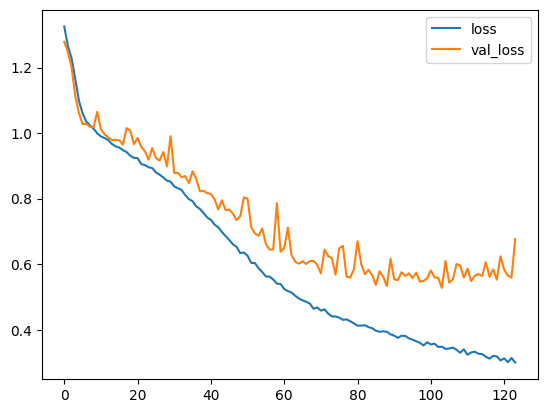

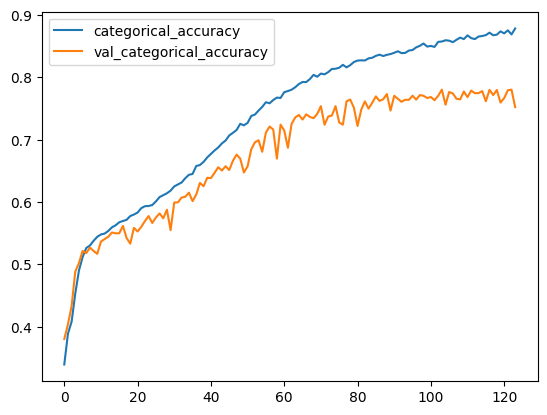

In [92]:
## Defining the Early Stopping.
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

Conv1D_LSTM = Sequential()
Conv1D_LSTM.add(Conv1D(filters=92, kernel_size=1, activation='relu',padding='same', input_shape=(None, 23)))
Conv1D_LSTM.add(LSTM(64))
Conv1D_LSTM.add(Dense(32, activation='relu'))
Conv1D_LSTM.add(Dense(8, activation='relu'))
Conv1D_LSTM.add(Dense(units=4, activation='softmax'))

Conv1D_LSTM.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy()])


history=Conv1D_LSTM.fit(
    X_train, y_train_encoded_1,
    epochs=10000,  # Adjust the number of epochs based on your needs
    batch_size=64,  # Adjust the batch size based on your available memory
    validation_data=(X_valid, y_valid_encoded_1),
    callbacks=[early_stopping]
)


history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_frame['val_loss'].min(), 
              history_frame['val_categorical_accuracy'].max()))

# Conv1D + GRU

In [93]:
X_train, X_valid, y_train, y_valid = train_test_split(repo_flatT2, Risk, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [94]:
from tensorflow.keras.utils import to_categorical

y_train_encoded_1 = to_categorical(y_train, 4)
y_valid_encoded_1 = to_categorical(y_valid, 4)

In [95]:
X_train_array = X_train.values
X_valid_array = X_valid.values

# Reshape the input data to have the required shape (None, 1, 23)
X_train = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_valid = X_valid_array.reshape(X_valid_array.shape[0], 1, X_valid_array.shape[1])

Epoch 1/10000
625/625 [==============================] - 6s 5ms/step - loss: 1.3723 - categorical_accuracy: 0.2927 - val_loss: 1.3266 - val_categorical_accuracy: 0.3513
Epoch 2/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.2950 - categorical_accuracy: 0.3755 - val_loss: 1.2796 - val_categorical_accuracy: 0.3789
Epoch 3/10000
625/625 [==============================] - 3s 4ms/step - loss: 1.2580 - categorical_accuracy: 0.3954 - val_loss: 1.2395 - val_categorical_accuracy: 0.4115
Epoch 4/10000
625/625 [==============================] - 3s 4ms/step - loss: 1.2050 - categorical_accuracy: 0.4301 - val_loss: 1.1858 - val_categorical_accuracy: 0.4479
Epoch 5/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.1376 - categorical_accuracy: 0.4719 - val_loss: 1.1096 - val_categorical_accuracy: 0.4808
Epoch 6/10000
625/625 [==============================] - 3s 5ms/step - loss: 1.0850 - categorical_accuracy: 0.4949 - val_loss: 1.0856 - val_categorical_acc

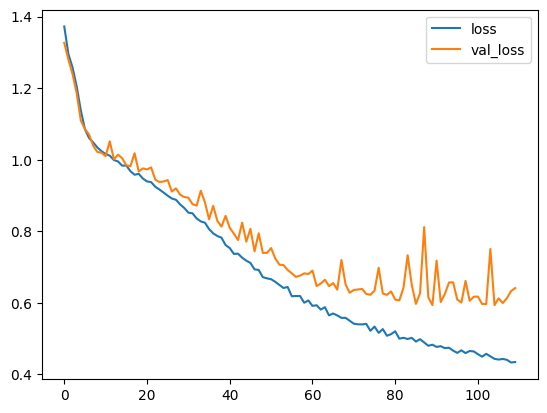

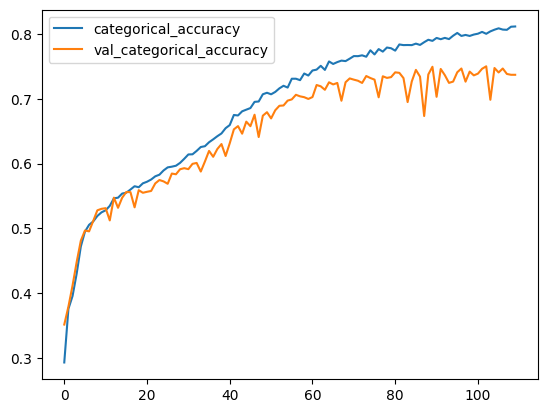

In [96]:
## Defining the Early Stopping.
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

Conv1D_GRU = Sequential()
Conv1D_GRU.add(Conv1D(filters=92, kernel_size=1, activation='relu',padding='same', input_shape=(None, 23)))
Conv1D_GRU.add(GRU(64))
Conv1D_GRU.add(Dense(32, activation='relu'))
Conv1D_GRU.add(Dense(8, activation='relu'))
Conv1D_GRU.add(Dense(units=4, activation='softmax'))

Conv1D_GRU.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy()])


history=Conv1D_GRU.fit(
    X_train, y_train_encoded_1,
    epochs=10000,  # Adjust the number of epochs based on your needs
    batch_size=64,  # Adjust the batch size based on your available memory
    validation_data=(X_valid, y_valid_encoded_1),
    callbacks=[early_stopping]
)


history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_frame['val_loss'].min(), 
              history_frame['val_categorical_accuracy'].max()))

# Dense Model

In [115]:
X_train, X_valid, y_train, y_valid = train_test_split(repo_flatT2, Risk, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [116]:
from tensorflow.keras.utils import to_categorical

y_train_encoded_1 = to_categorical(y_train, 4)
y_valid_encoded_1 = to_categorical(y_valid, 4)

Epoch 1/10000
625/625 [==============================] - 4s 4ms/step - loss: 1.3613 - categorical_accuracy: 0.3092 - val_loss: 1.3057 - val_categorical_accuracy: 0.3762
Epoch 2/10000
625/625 [==============================] - 2s 4ms/step - loss: 1.2992 - categorical_accuracy: 0.3695 - val_loss: 1.2667 - val_categorical_accuracy: 0.3938
Epoch 3/10000
625/625 [==============================] - 2s 4ms/step - loss: 1.2709 - categorical_accuracy: 0.3834 - val_loss: 1.2494 - val_categorical_accuracy: 0.3938
Epoch 4/10000
625/625 [==============================] - 2s 4ms/step - loss: 1.2394 - categorical_accuracy: 0.4047 - val_loss: 1.2040 - val_categorical_accuracy: 0.4291
Epoch 5/10000
625/625 [==============================] - 2s 4ms/step - loss: 1.2082 - categorical_accuracy: 0.4224 - val_loss: 1.1716 - val_categorical_accuracy: 0.4415
Epoch 6/10000
625/625 [==============================] - 2s 4ms/step - loss: 1.1814 - categorical_accuracy: 0.4396 - val_loss: 1.1372 - val_categorical_acc

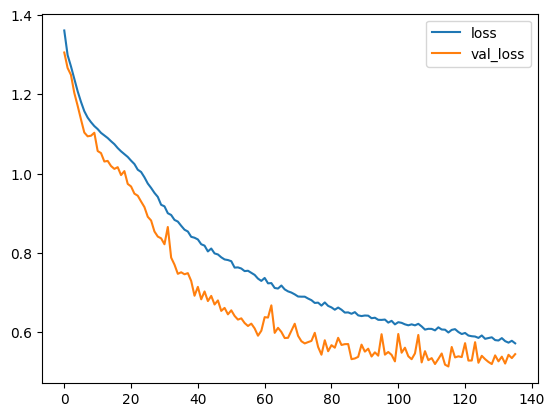

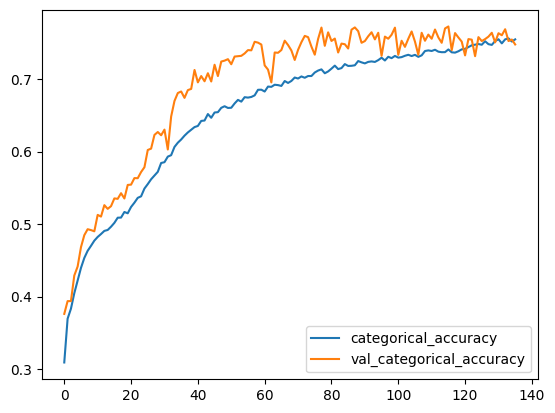

In [ ]:
## Defining the Early Stopping.
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

DenseNN = Sequential()
DenseNN.add(Dense(92,activation='relu', input_shape=[23]))
DenseNN.add(Dropout(0.1))
DenseNN.add(Dense(46, activation='relu'))
DenseNN.add(Dropout(0.1))
DenseNN.add(Dense(23, activation='relu'))
DenseNN.add(Dense(11, activation='relu'))
DenseNN.add(Dense(units=4, activation='softmax'))

DenseNN.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy()])


history=DenseNN.fit(
    X_train, y_train_encoded_1,
    epochs=10000,  # Adjust the number of epochs based on your needs
    batch_size=64,  # Adjust the batch size based on your available memory
    validation_data=(X_valid, y_valid_encoded_1),
    callbacks=[early_stopping]
)


history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_frame['val_loss'].min(), 
              history_frame['val_categorical_accuracy'].max()))

In [ ]:
# # # Specify the indices for the 25x10 part you want to save
# # start_row, end_row = 0, 10  # Rows 50 to 74
# # start_col, end_col = 2, 27  # Columns 3 to 12

# # Extract the desired part of the dataset using slicing
# for i in range(50000):
#     selected_part2=pd.DataFrame()
#     selected_part2 = repo.iloc[i*10:(i+1)*10, 2:27]

#     numpy_array = selected_part2.values

#     if (risk_final.iloc[i,1]==0):
#         # Convert the NumPy array to a grayscale image
#         image = (numpy_array * 255).astype(np.uint8)

#         # Generate a systematic name for the image based on the loop counter (or other identifier)
#         image_name = f'image_{i + 1:05d}.png'

#         # Specify the file path for each image
#         file_path = os.path.join('/kaggle/working/No_Risk', image_name)

#         # Save the image using OpenCV
#         cv2.imwrite(file_path, image)
#     if (risk_final.iloc[i,1]==1):
#         # Convert the NumPy array to a grayscale image
#         image = (numpy_array * 255).astype(np.uint8)

#         # Generate a systematic name for the image based on the loop counter (or other identifier)
#         image_name = f'image_{i + 1:05d}.png'

#         # Specify the file path for each image
#         file_path = os.path.join('/kaggle/working/Low_Risk', image_name)

#         # Save the image using OpenCV
#         cv2.imwrite(file_path, image)
#     if (risk_final.iloc[i,1]==2):
#         # Convert the NumPy array to a grayscale image
#         image = (numpy_array * 255).astype(np.uint8)

#         # Generate a systematic name for the image based on the loop counter (or other identifier)
#         image_name = f'image_{i + 1:05d}.png'

#         # Specify the file path for each image
#         file_path = os.path.join('/kaggle/working/Medium_Risk', image_name)

#         # Save the image using OpenCV
#         cv2.imwrite(file_path, image)
#     if (risk_final.iloc[i,1]==3):
#         # Convert the NumPy array to a grayscale image
#         image = (numpy_array * 255).astype(np.uint8)

#         # Generate a systematic name for the image based on the loop counter (or other identifier)
#         image_name = f'image_{i + 1:05d}.png'

#         # Specify the file path for each image
#         file_path = os.path.join('/kaggle/working/Catastrophic', image_name)

#         # Save the image using OpenCV
#         cv2.imwrite(file_path, image)

In [ ]:
# import shutil
# import os

# # Specify the directory to be downloaded
# directory_path = '/kaggle/working/No_Risk'
# # Create a zip file of the directory
# shutil.make_archive(directory_path, 'zip', directory_path)

# # Specify the directory to be downloaded
# directory_path = '/kaggle/working/Medium_Risk'
# # Create a zip file of the directory
# shutil.make_archive(directory_path, 'zip', directory_path)

# # Specify the directory to be downloaded
# directory_path = '/kaggle/working/Catastrophic'
# # Create a zip file of the directory
# shutil.make_archive(directory_path, 'zip', directory_path)

# # Specify the directory to be downloaded
# directory_path = '/kaggle/working/Low_Risk'
# # Create a zip file of the directory
# shutil.make_archive(directory_path, 'zip', directory_path)

In [ ]:
# import os
# from sklearn.model_selection import train_test_split

# # Define the path to the Kaggle output directory
# kaggle_output_path = '/kaggle/input/imageconverted'

# # Assuming you have subdirectories in your Kaggle output path, each representing a different class
# class_folders = [folder for folder in os.listdir(kaggle_output_path) if os.path.isdir(os.path.join(kaggle_output_path, folder))]

# # Initialize lists to store images and corresponding labels
# images = []
# labels = []

# # Load images from each class folder, excluding zip files
# for label, class_folder in enumerate(class_folders):
#     class_path = os.path.join(kaggle_output_path, class_folder)
    
#     # Filter out zip files
#     image_files = [filename for filename in os.listdir(class_path) if not filename.endswith('.zip')]
    
#     for filename in image_files:
#         img_path = os.path.join(class_path, filename)
#         # Load the image (you might want to resize or preprocess it)
#         images.append(img_path)
#         # Assign the label based on the folder name
#         labels.append(label)

# # Split the data into training and validation sets
# X_train_paths, X_val_paths, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)




In [ ]:
# import os
# from sklearn.model_selection import train_test_split

# data_dir = '/kaggle/input/imageconverted'

# # Get class labels (folder names)
# class_labels = os.listdir(data_dir)

# final_train_images = []
# final_train_labels = []
# final_val_images = []
# final_val_labels = []

# for label in class_labels:
#     label_dir = os.path.join(data_dir, label)
#     images = [os.path.join(label_dir, img) for img in os.listdir(label_dir)]

#     # Perform stratified split for each class
#     train_images, val_images = train_test_split(images, test_size=0.2, random_state=42)

#     # Append or extend to the final datasets
#     final_train_images.extend(train_images)
#     final_train_labels.extend([label] * len(train_images))
#     final_val_images.extend(val_images)
#     final_val_labels.extend([label] * len(val_images))

# # # Shuffle (optional)
# # from sklearn.utils import shuffle
# # final_train_images, final_train_labels = shuffle(final_train_images, final_train_labels, random_state=42)
# # final_val_images, final_val_labels = shuffle(final_val_images, final_val_labels, random_state=42)


In [ ]:
# len(final_val_images)

In [ ]:
# # Function to load and preprocess grayscale images using OpenCV
# def load_and_preprocess_grayscale_image(file_path, target_size=(10, 25)):
#     # Read the grayscale image using OpenCV
#     image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
#     # Normalize pixel values (optional, adjust based on your model requirements)
#     image = image / 255.0
    
#     # Add a channel dimension to match the input shape of a CNN (channels-last format)
#     image = np.expand_dims(image, axis=-1)
    
#     return image

# # Load and preprocess all grayscale images in X_train_paths
# X_train = [load_and_preprocess_grayscale_image(file_path) for file_path in final_train_images]

# # Convert the list to a NumPy array
# X_train = np.array(X_train)

# # Load and preprocess all grayscale images in X_train_paths
# X_val = [load_and_preprocess_grayscale_image(file_path) for file_path in final_val_images]

# # Convert the list to a NumPy array
# X_val = np.array(X_val)


In [ ]:
# # Define a mapping from categories to numerical values
# category_mapping = {
#     "Catastrophic": 3,
#     "Medium_Risk": 2,
#     "Low_Risk": 1,
#     "No_Risk": 0
# }

# # Use a list comprehension to map the values
# final_train_labels = [category_mapping[category] for category in final_train_labels]

# final_val_labels = [category_mapping[category] for category in final_val_labels]

In [ ]:
# from sklearn.utils import shuffle

# final_train_images, final_train_labels = shuffle(final_train_images, final_train_labels, random_state=42)
# final_val_images, final_val_labels = shuffle(final_val_images, final_val_labels, random_state=42)

In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_train_encoded = to_categorical(final_train_labels, 4)
# y_val_encoded = to_categorical(final_val_labels, 4)

# SimpleRNN Model

In [122]:
X_train, X_valid, y_train, y_valid = train_test_split(repo_flatT2, Risk, train_size=0.8, test_size=0.2,
                                                                random_state=42)

In [123]:
from tensorflow.keras.utils import to_categorical

y_train_encoded_1 = to_categorical(y_train, 4)
y_valid_encoded_1 = to_categorical(y_valid, 4)

In [124]:
X_train_array = X_train.values
X_valid_array = X_valid.values

# Reshape the input data to have the required shape (None, 1, 23)
X_train = X_train_array.reshape(X_train_array.shape[0], 1, X_train_array.shape[1])
X_valid = X_valid_array.reshape(X_valid_array.shape[0], 1, X_valid_array.shape[1])

Epoch 1/10000
313/313 [==============================] - 3s 5ms/step - loss: 1.3451 - categorical_accuracy: 0.3318 - val_loss: 1.3030 - val_categorical_accuracy: 0.3708
Epoch 2/10000
313/313 [==============================] - 1s 5ms/step - loss: 1.2921 - categorical_accuracy: 0.3765 - val_loss: 1.2969 - val_categorical_accuracy: 0.3632
Epoch 3/10000
313/313 [==============================] - 1s 4ms/step - loss: 1.2781 - categorical_accuracy: 0.3812 - val_loss: 1.2715 - val_categorical_accuracy: 0.3790
Epoch 4/10000
313/313 [==============================] - 1s 4ms/step - loss: 1.2678 - categorical_accuracy: 0.3848 - val_loss: 1.2629 - val_categorical_accuracy: 0.3877
Epoch 5/10000
313/313 [==============================] - 1s 4ms/step - loss: 1.2600 - categorical_accuracy: 0.3889 - val_loss: 1.2555 - val_categorical_accuracy: 0.3903
Epoch 6/10000
313/313 [==============================] - 1s 4ms/step - loss: 1.2527 - categorical_accuracy: 0.3919 - val_loss: 1.2530 - val_categorical_acc

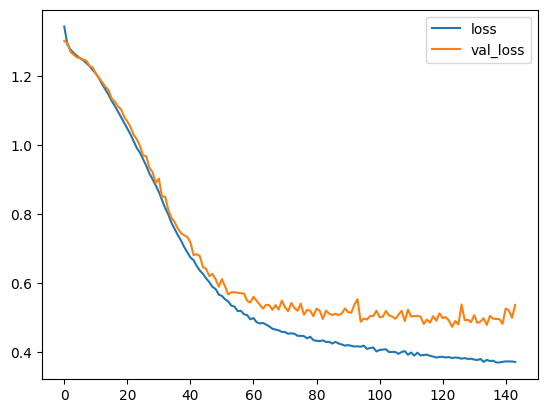

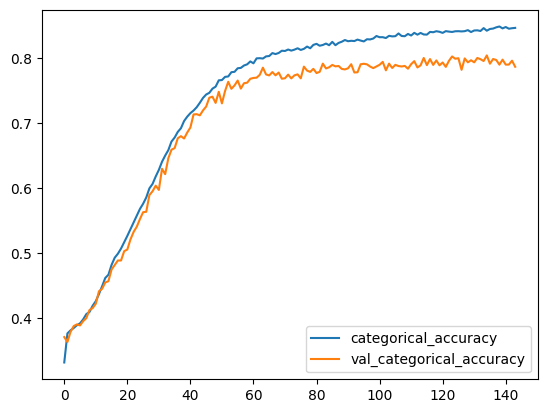

In [126]:
## Defining the Early Stopping.
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

from tensorflow import keras
from tensorflow.keras import layers

SimpleRNN_Model = keras.Sequential([
    layers.SimpleRNN(units=128,input_shape=(None,23)),
    layers.Dense(units=64, activation="relu"),
#   layers.SimpleRNN(units=32,input_shape=(None,64)),
    layers.Dense(units=16, activation="relu"),
    layers.Dense(4, activation="softmax"),
])


SimpleRNN_Model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy()])


history=SimpleRNN_Model.fit(
    X_train, y_train_encoded_1,
    epochs=10000,  # Adjust the number of epochs based on your needs
    batch_size=128,  # Adjust the batch size based on your available memory
    validation_data=(X_valid, y_valid_encoded_1),
    callbacks=[early_stopping]
)


history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['categorical_accuracy', 'val_categorical_accuracy']].plot();

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_frame['val_loss'].min(), 
              history_frame['val_categorical_accuracy'].max()))

# AutoGluon Tabular Predictor

In [127]:
!python -m pip install --upgrade pip
!python -m pip install autogluon

In [128]:
risked_repo=pd.concat([repo_flatT2,Risk],axis=1)

In [129]:
risked_repo

S2T2    S3T2    S4T2    S5T2    S6T2    S7T2    S8T2    S9T2   S10T2  \
0      0.1698  0.6974  0.1273  0.5090  0.3354  0.8128  0.2753  0.1591  0.9358   
1      0.2622  0.5555  0.2837  0.1444  0.7606  0.1316  0.5048  0.5173  0.9498   
2      0.7249  0.9947  0.0361  0.5556  0.3342  0.3536  0.2765  0.5024  0.3991   
3      0.7113  0.7325  0.8177  0.7547  0.5533  0.7257  0.9839  0.3260  0.2939   
4      0.6626  0.9569  0.9741  0.3823  0.1204  0.5896  0.4931  0.7924  0.1719   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.4590  0.8404  0.2650  0.2548  0.0122  0.2092  0.9327  0.0891  0.0259   
49996  0.6096  0.5422  0.7421  0.2278  0.4284  0.9149  0.1308  0.1946  0.8733   
49997  0.1331  0.6210  0.5181  0.8670  0.8230  0.9068  0.3389  0.2208  0.1168   
49998  0.5920  0.5583  0.0949  0.4257  0.4248  0.8859  0.0212  0.5729  0.5209   
49999  0.2163  0.1643  0.2265  0.9406  0.6559  0.5830  0.4123  0.3080  0.1976   

        S11T2  ...   S17T2   S18T2   S19T2   S20T2   S21T2   S22T2   S23T2  \
0      0.6722  ...  0.1517  0.6923  0.7245  0.6380  0.0089  0.4479  0.6776   
1      0.0543  ...  0.4128  0.4043  0.6029  0.9818  0.7710  0.5960  0.9843   
2      0.0339  ...  0.7939  0.3583  0.2893  0.4324  0.9970  0.2935  0.1482   
3      0.2951  ...  0.8507  0.2165  0.2635  0.9157  0.2851  0.1902  0.2367   
4      0.6720  ...  0.0226  0.3803  0.8984  0.9216  0.1483  0.1575  0.0770   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
49995  0.6347  ...  0.3029  0.7594  0.0563  0.2069  0.4669  0.7506  0.8358   
49996  0.1544  ...  0.4407  0.7217  0.8120  0.6902  0.2752  0.1646  0.8627   
49997  0.2644  ...  0.6855  0.7941  0.0260  0.1715  0.2815  0.3426  0.3552   
49998  0.9200  ...  0.4002  0.6886  0.5253  0.9319  0.0701  0.4097  0.2532   
49999  0.6134  ...  0.0436  0.8426  0.2371  0.6578  0.0270  0.7201  0.4489   

        S24T2   S25T2  Risk  
0      0.7189  0.2121     1  
1      0.6970  0.8146     2  
2      0.0261  0.5637     3  
3      0.9471  0.8961     1  
4      0.9685  0.2536     1  
...       ...     ...   ...  
49995  0.8303  0.4078     0  
49996  0.2494  0.7245     3  
49997  0.5223  0.9796     1  
49998  0.3455  0.6550     0  
49999  0.4848  0.5125     1  

[50000 rows x 24 columns]

In [131]:
from autogluon.tabular import TabularPredictor

# Specify the label column
label_column = 'Risk'

# Create a TabularPredictor
AutoGluon = TabularPredictor(label=label_column,)

# Train the model
AutoGluon.fit(train_data=risked_repo)


No path specified. Models will be saved in: "AutogluonModels/ag-20240227_154015"
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets.
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='best_quality'   : Maximize accuracy. Default time_limit=3600.
	presets='high_quality'   : Strong accuracy with fast inference speed. Default time_limit=3600.
	presets='good_quality'   : Good accuracy with very fast inference speed. Default time_limit=3600.
	presets='medium_quality' : Fast training time, ideal for initial prototyping.
Beginning AutoGluon training ...
AutoGluon will save models to "AutogluonModels/ag-20240227_154015"
=================== System Info ===================
AutoGluon Version:  1.0.0
Python Version:     3.10.13
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Tue Dec 19 13:14:11 UTC 2023
CPU Count:       

# Conv2D Model

In [195]:
def repeat_elements(arr, repeat_count):
    repeated_arr = np.repeat(arr, repeat_count)
    return repeated_arr
# Example usage:
original_array = Risk["Risk"].to_numpy()
repeat_count = 10
result_array = repeat_elements(original_array, repeat_count)

[1 1 1 ... 1 1 1]


In [196]:
repo_n=repo.copy()
repo_n=repo.drop(['Unit ID','TimeStamp'], axis=1)

In [201]:
repo_n

Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  Sensor 6  Sensor 7  \
0         0.4337    0.7431    0.9390    0.7541    0.9035    0.7943    0.2622   
1         0.7859    0.1925    0.9024    0.8108    0.2016    0.9649    0.2445   
2         0.0512    0.9633    0.1423    0.8404    0.6654    0.4348    0.5751   
3         0.0413    0.1588    0.1675    0.0971    0.2918    0.1970    0.0971   
4         0.7042    0.4724    0.3901    0.2793    0.2522    0.1933    0.2694   
...          ...       ...       ...       ...       ...       ...       ...   
499995    0.1691    0.9308    0.4897    0.7745    0.6919    0.7147    0.1966   
499996    0.2817    0.6392    0.9709    0.5667    0.0822    0.9976    0.7358   
499997    0.5622    0.7094    0.1205    0.7765    0.5579    0.4585    0.0583   
499998    0.3565    0.4717    0.6521    0.6147    0.2524    0.3296    0.1769   
499999    0.7871    0.2163    0.1643    0.2265    0.9406    0.6559    0.5830   

        Sensor 8  Sensor 9  Sensor 10  ...  Sensor 16  Sensor 17  Sensor 18  \
0         0.5901    0.7558     0.2675  ...     0.5696     0.6407     0.7027   
1         0.8934    0.9039     0.9474  ...     0.4259     0.7456     0.5750   
2         0.8067    0.3372     0.3346  ...     0.4753     0.5449     0.8531   
3         0.2039    0.3392     0.8863  ...     0.7959     0.5306     0.3109   
4         0.4110    0.3608     0.3153  ...     0.2474     0.5711     0.5686   
...          ...       ...        ...  ...        ...        ...        ...   
499995    0.7731    0.0757     0.3044  ...     0.8995     0.4435     0.0846   
499996    0.9617    0.4872     0.4591  ...     0.9600     0.4254     0.7402   
499997    0.1459    0.3782     0.5737  ...     0.7685     0.7410     0.9113   
499998    0.9617    0.4501     0.9534  ...     0.5341     0.8423     0.5090   
499999    0.4123    0.3080     0.1976  ...     0.2767     0.0436     0.8426   

        Sensor 19  Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  \
0          0.7163     0.9954     0.8303     0.1641     0.7893     0.7533   
1          0.7947     0.4663     0.4303     0.3643     0.0558     0.1330   
2          0.6337     0.8807     0.2560     0.0597     0.5751     0.7797   
3          0.2726     0.3298     0.4658     0.7479     0.8747     0.2677   
4          0.6575     0.1447     0.5774     0.4022     0.6753     0.8371   
...           ...        ...        ...        ...        ...        ...   
499995     0.6193     0.3040     0.9287     0.3918     0.2143     0.8486   
499996     0.2611     0.8659     0.7473     0.1093     0.3094     0.7807   
499997     0.3729     0.1165     0.0866     0.2817     0.4906     0.7756   
499998     0.8436     0.9809     0.2696     0.5609     0.6706     0.1297   
499999     0.2371     0.6578     0.0270     0.7201     0.4489     0.4848   

        Sensor 25  
0          0.2925  
1          0.0295  
2          0.8544  
3          0.3816  
4          0.6748  
...           ...  
499995     0.3380  
499996     0.7287  
499997     0.5428  
499998     0.8826  
499999     0.5125  

[500000 rows x 25 columns]

In [206]:
repo_n_values = repo_n.values
repo_r = repo_n_values.reshape(-1, 10, 25, 1)

In [297]:
repo_r.shape

(50000, 10, 25, 1)

In [209]:
from tensorflow.keras.utils import to_categorical
y_train_encoded_1 = to_categorical(Risk, 4)

In [212]:
## Defining the Early Stopping.
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=20,
    restore_best_weights=True,
)

from tensorflow import keras
from tensorflow.keras import layers

Conv2D_Model = Sequential()
Conv2D_Model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(10, 25, 1)))
Conv2D_Model.add(MaxPooling2D(pool_size=(2, 2)))
Conv2D_Model.add(Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same'))
Conv2D_Model.add(MaxPooling2D(pool_size=(2, 2)))
Conv2D_Model.add(Flatten())
Conv2D_Model.add(Dense(128, activation='relu'))
Conv2D_Model.add(Dense(4, activation='softmax'))



Conv2D_Model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[keras.metrics.CategoricalAccuracy()])


history=Conv2D_Model.fit(
    repo_r, y_train_encoded_1,
    epochs=350,  # Adjust the number of epochs based on your needs
    batch_size=128,  # Adjust the batch size based on your available memory
    #validation_data=(X_valid, y_valid_encoded_1),
    callbacks=[early_stopping]
)

Best Training Loss: 0.3076
Best Training Accuracy: 0.8723


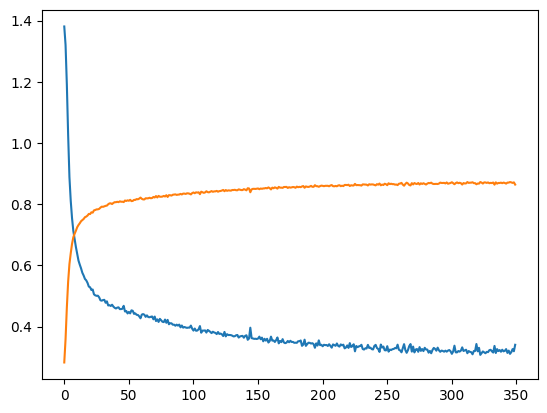

In [214]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, 'loss'].plot()
history_frame.loc[:, 'categorical_accuracy'].plot();

print(("Best Training Loss: {:0.4f}" +\
      "\nBest Training Accuracy: {:0.4f}")\
      .format(history_frame['loss'].min(), 
              history_frame['categorical_accuracy'].max()))

# Pre-Pro

In [245]:
repo_test=pd.DataFrame()
repo_test=test
repo_test=repo_test.dropna()
repo_test.reset_index(drop=True, inplace=True)

In [246]:
repo_test

Unit ID  Timestamp  Sensor 1  Sensor 2  Sensor 3  Sensor 4  Sensor 5  \
0       50000          1    0.3786    0.7031    0.0734    0.0492    0.8328   
1       50000          2    0.0871    0.3716    0.1444    0.4848    0.8051   
2       50000          3    0.7733    0.3273    0.0397    0.2026    0.7231   
3       50000          4    0.4817    0.6624    0.3319    0.7669    0.4364   
4       50000          5    0.0100    0.8568    0.5611    0.0171    0.2108   
...       ...        ...       ...       ...       ...       ...       ...   
9995    50999          6    0.5563    0.0273    0.4050    0.0035    0.8710   
9996    50999          7    0.0702    0.7417    0.8893    0.3615    0.6888   
9997    50999          8    0.1935    0.8997    0.3039    0.9757    0.5910   
9998    50999          9    0.2718    0.7367    0.6270    0.8462    0.4284   
9999    50999         10    0.0469    0.0085    0.3151    0.5123    0.2128   

      Sensor 6  Sensor 7  Sensor 8  ...  Sensor 16  Sensor 17  Sensor 18  \
0       0.9048    0.7850    0.9979  ...     0.6897     0.9130     0.5681   
1       0.6569    0.8121    0.5083  ...     0.6067     0.1750     0.3267   
2       0.4640    0.2385    0.0435  ...     0.2943     0.5956     0.4769   
3       0.1332    0.4890    0.7637  ...     0.4996     0.2766     0.4083   
4       0.1046    0.4475    0.8220  ...     0.2412     0.4066     0.2261   
...        ...       ...       ...  ...        ...        ...        ...   
9995    0.3533    0.8382    0.5167  ...     0.6842     0.8704     0.1593   
9996    0.5658    0.9178    0.6649  ...     0.1328     0.3443     0.7526   
9997    0.5253    0.0459    0.3327  ...     0.0930     0.1710     0.2240   
9998    0.4649    0.0397    0.3281  ...     0.3151     0.1197     0.4840   
9999    0.2023    0.7841    0.9495  ...     0.5829     0.4715     0.2034   

      Sensor 19  Sensor 20  Sensor 21  Sensor 22  Sensor 23  Sensor 24  \
0        0.0129     0.4369     0.5533     0.2384     0.4805     0.3959   
1        0.1499     0.4746     0.2572     0.7884     0.3364     0.8252   
2        0.8894     0.8833     0.0786     0.4448     0.0071     0.4052   
3        0.9838     0.5823     0.3014     0.2781     0.1267     0.7782   
4        0.1200     0.8346     0.3691     0.5683     0.1112     0.7261   
...         ...        ...        ...        ...        ...        ...   
9995     0.1494     0.6192     0.2081     0.4659     0.8334     0.6913   
9996     0.0556     0.8064     0.5836     0.7398     0.6256     0.6917   
9997     0.8013     0.1723     0.4518     0.9341     0.5166     0.2043   
9998     0.5379     0.7549     0.3839     0.6309     0.8746     0.6079   
9999     0.5418     0.6209     0.7071     0.8569     0.7406     0.1911   

      Sensor 25  
0        0.4756  
1        0.8013  
2        0.5436  
3        0.1162  
4        0.5521  
...         ...  
9995     0.2214  
9996     0.8379  
9997     0.9384  
9998     0.4322  
9999     0.3436  

[10000 rows x 27 columns]

In [247]:
repo_flatT=pd.DataFrame()

# indices_to_access = list(range(9, 500000, 10))
# selected_values_array = repo['Sensor 1'].iloc[indices_to_access].to_numpy()
# repo_flatT2["S1T2"]=selected_values_array

indices_to_access = list(range(9, 10000, 10))
selected_values_array = repo_test['Sensor 2'].iloc[indices_to_access].to_numpy()
repo_flatT["S2T2"]=selected_values_array


selected_values_array = repo_test['Sensor 3'].iloc[indices_to_access].to_numpy()
repo_flatT["S3T2"]=selected_values_array


selected_values_array = repo_test['Sensor 4'].iloc[indices_to_access].to_numpy()
repo_flatT["S4T2"]=selected_values_array


selected_values_array = repo_test['Sensor 5'].iloc[indices_to_access].to_numpy()
repo_flatT["S5T2"]=selected_values_array


selected_values_array = repo_test['Sensor 6'].iloc[indices_to_access].to_numpy()
repo_flatT["S6T2"]=selected_values_array


selected_values_array = repo_test['Sensor 7'].iloc[indices_to_access].to_numpy()
repo_flatT["S7T2"]=selected_values_array


selected_values_array = repo_test['Sensor 8'].iloc[indices_to_access].to_numpy()
repo_flatT["S8T2"]=selected_values_array


selected_values_array = repo_test['Sensor 9'].iloc[indices_to_access].to_numpy()
repo_flatT["S9T2"]=selected_values_array


selected_values_array = repo_test['Sensor 10'].iloc[indices_to_access].to_numpy()
repo_flatT["S10T2"]=selected_values_array


selected_values_array = repo_test['Sensor 11'].iloc[indices_to_access].to_numpy()
repo_flatT["S11T2"]=selected_values_array


selected_values_array = repo_test['Sensor 12'].iloc[indices_to_access].to_numpy()
repo_flatT["S12T2"]=selected_values_array

# indices_to_access = list(range(9, 500000, 10))
# selected_values_array = repo['Sensor 13'].iloc[indices_to_access].to_numpy()
# repo_flatT2["S13T2"]=selected_values_array


selected_values_array = repo_test['Sensor 14'].iloc[indices_to_access].to_numpy()
repo_flatT["S14T2"]=selected_values_array


selected_values_array = repo_test['Sensor 15'].iloc[indices_to_access].to_numpy()
repo_flatT["S15T2"]=selected_values_array


selected_values_array = repo_test['Sensor 10'].iloc[indices_to_access].to_numpy()
repo_flatT["S10T2"]=selected_values_array


selected_values_array = repo_test['Sensor 16'].iloc[indices_to_access].to_numpy()
repo_flatT["S16T2"]=selected_values_array


selected_values_array = repo_test['Sensor 17'].iloc[indices_to_access].to_numpy()
repo_flatT["S17T2"]=selected_values_array


selected_values_array = repo_test['Sensor 18'].iloc[indices_to_access].to_numpy()
repo_flatT["S18T2"]=selected_values_array


selected_values_array = repo_test['Sensor 19'].iloc[indices_to_access].to_numpy()
repo_flatT["S19T2"]=selected_values_array


selected_values_array = repo_test['Sensor 20'].iloc[indices_to_access].to_numpy()
repo_flatT["S20T2"]=selected_values_array


selected_values_array = repo_test['Sensor 21'].iloc[indices_to_access].to_numpy()
repo_flatT["S21T2"]=selected_values_array


selected_values_array = repo_test['Sensor 22'].iloc[indices_to_access].to_numpy()
repo_flatT["S22T2"]=selected_values_array


selected_values_array = repo_test['Sensor 23'].iloc[indices_to_access].to_numpy()
repo_flatT["S23T2"]=selected_values_array


selected_values_array = repo_test['Sensor 24'].iloc[indices_to_access].to_numpy()
repo_flatT["S24T2"]=selected_values_array


selected_values_array = repo_test['Sensor 25'].iloc[indices_to_access].to_numpy()
repo_flatT["S25T2"]=selected_values_array

In [248]:
repo_flatT

S2T2    S3T2    S4T2    S5T2    S6T2    S7T2    S8T2    S9T2   S10T2  \
0    0.3884  0.7674  0.8031  0.8452  0.4299  0.6276  0.9165  0.9301  0.6162   
1    0.9341  0.2527  0.8416  0.4042  0.5642  0.9510  0.3611  0.0048  0.7951   
2    0.1471  0.3798  0.9720  0.5521  0.4340  0.8692  0.7661  0.7026  0.0449   
3    0.8690  0.2784  0.5886  0.8039  0.0482  0.3616  0.2252  0.0667  0.1316   
4    0.2121  0.8597  0.6099  0.6620  0.9400  0.1022  0.9978  0.2432  0.1024   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
995  0.7540  0.1938  0.5054  0.0068  0.3061  0.0608  0.2397  0.1165  0.5519   
996  0.2428  0.5699  0.3067  0.5057  0.6515  0.5572  0.9547  0.3849  0.9212   
997  0.1369  0.4556  0.0351  0.3770  0.2384  0.5623  0.7234  0.4226  0.3926   
998  0.5931  0.5799  0.9540  0.9770  0.0855  0.1536  0.5867  0.3434  0.3661   
999  0.0085  0.3151  0.5123  0.2128  0.2023  0.7841  0.9495  0.8293  0.6303   

      S11T2  ...   S16T2   S17T2   S18T2   S19T2   S20T2   S21T2   S22T2  \
0    0.0158  ...  0.3206  0.5867  0.2099  0.9193  0.7823  0.1557  0.3059   
1    0.7508  ...  0.8840  0.0967  0.7105  0.3841  0.0912  0.9371  0.4542   
2    0.0626  ...  0.1618  0.2435  0.7169  0.7385  0.3024  0.1202  0.5954   
3    0.3494  ...  0.3071  0.2050  0.3584  0.0789  0.9004  0.4634  0.9983   
4    0.8505  ...  0.0205  0.2059  0.0913  0.9625  0.6247  0.3046  0.6431   
..      ...  ...     ...     ...     ...     ...     ...     ...     ...   
995  0.0552  ...  0.9301  0.5094  0.0162  0.5498  0.7543  0.4566  0.6255   
996  0.2455  ...  0.1063  0.5722  0.1005  0.4514  0.2229  0.4652  0.7866   
997  0.4917  ...  0.4554  0.7901  0.0286  0.9044  0.1317  0.9967  0.2398   
998  0.5978  ...  0.0998  0.7698  0.1724  0.2441  0.8362  0.3583  0.8134   
999  0.3267  ...  0.5829  0.4715  0.2034  0.5418  0.6209  0.7071  0.8569   

      S23T2   S24T2   S25T2  
0    0.9030  0.7611  0.9389  
1    0.6234  0.9057  0.0938  
2    0.5080  0.9327  0.9669  
3    0.2578  0.3246  0.8731  
4    0.9964  0.8303  0.3094  
..      ...     ...     ...  
995  0.9991  0.8741  0.3453  
996  0.3426  0.8709  0.6302  
997  0.2766  0.7970  0.3084  
998  0.1384  0.8892  0.6237  
999  0.7406  0.1911  0.3436  

[1000 rows x 23 columns]

In [249]:
Test_array = repo_flatT.values
repo_flatT00 = Test_array.reshape(Test_array.shape[0], 1, Test_array.shape[1])

In [250]:
Conv1D_LSTM_pred=Conv1D_LSTM.predict(repo_flatT00)

32/32 [==============================] - 0s 2ms/step


In [251]:
Conv1D_GRU_pred=Conv1D_GRU.predict(repo_flatT00)

32/32 [==============================] - 0s 2ms/step


In [252]:
DenseNN_pred=DenseNN.predict(repo_flatT)

32/32 [==============================] - 0s 1ms/step


In [253]:
SimpleRNN_Model_pred=SimpleRNN_Model.predict(repo_flatT00)

32/32 [==============================] - 0s 2ms/step


In [254]:
AutoGluon_pred=AutoGluon.predict(repo_flatT)

In [299]:
repo_flatT99=repo_test.drop(['Unit ID','Timestamp'], axis=1)
repo_t_values = repo_flatT99.values
repo_C2T = repo_t_values.reshape(-1, 10, 25, 1)

Conv2D_Model_pred=Conv2D_Model.predict(repo_C2T)

32/32 [==============================] - 0s 3ms/step


In [300]:
repo_C2T.shape

(1000, 10, 25, 1)

In [256]:
Conv1D_LSTM_pred

array([[5.1201758e-05, 1.2413072e-01, 8.7362921e-01, 2.1888241e-03],
       [8.7164170e-01, 1.2813827e-01, 6.4477157e-05, 1.5562864e-04],
       [2.5137174e-01, 7.3783582e-01, 9.1328993e-03, 1.6596216e-03],
       ...,
       [2.9642775e-05, 4.8725217e-04, 9.9947876e-01, 4.3655841e-06],
       [2.9482846e-05, 3.2697620e-03, 9.1848743e-01, 7.8213401e-02],
       [9.5269096e-01, 4.1512210e-02, 3.0329020e-04, 5.4935208e-03]],
      dtype=float32)

In [257]:
Conv1D_LSTM_pred_labels = np.argmax(Conv1D_LSTM_pred, axis=1)
Conv1D_LSTM_pred_labels

array([2, 0, 1, 3, 2, 2, 2, 0, 0, 3, 2, 0, 3, 1, 1, 0, 3, 3, 1, 0, 3, 3,
       2, 3, 0, 2, 0, 0, 3, 0, 1, 3, 3, 1, 2, 0, 1, 1, 3, 2, 2, 0, 3, 0,
       3, 2, 1, 2, 0, 3, 2, 1, 0, 0, 3, 3, 3, 0, 0, 2, 3, 3, 0, 1, 0, 1,
       0, 3, 0, 2, 3, 3, 3, 3, 3, 2, 1, 0, 3, 3, 2, 3, 1, 3, 1, 0, 0, 3,
       1, 0, 3, 1, 0, 0, 0, 2, 3, 1, 3, 3, 0, 3, 3, 1, 1, 1, 0, 3, 0, 0,
       3, 2, 2, 3, 0, 2, 3, 1, 3, 0, 2, 0, 1, 1, 1, 3, 2, 3, 3, 0, 0, 1,
       0, 3, 3, 1, 0, 3, 3, 2, 1, 2, 3, 3, 2, 0, 0, 0, 1, 2, 3, 0, 1, 1,
       3, 0, 0, 1, 1, 0, 0, 1, 3, 3, 1, 1, 3, 0, 1, 3, 2, 2, 3, 1, 2, 0,
       3, 0, 0, 0, 0, 1, 3, 2, 1, 2, 1, 1, 1, 3, 3, 1, 2, 0, 0, 3, 3, 3,
       3, 1, 1, 0, 0, 0, 1, 3, 1, 0, 3, 0, 2, 1, 3, 2, 1, 3, 0, 0, 2, 1,
       3, 0, 2, 3, 3, 1, 3, 1, 1, 1, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 3, 1,
       0, 3, 0, 3, 2, 3, 2, 1, 1, 3, 1, 2, 0, 1, 2, 0, 3, 0, 0, 3, 2, 3,
       3, 1, 3, 2, 2, 0, 3, 3, 3, 3, 0, 1, 2, 3, 0, 1, 2, 2, 2, 3, 0, 2,
       3, 2, 0, 3, 3, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [258]:
Conv1D_GRU_pred

array([[1.2573361e-02, 3.1307063e-01, 6.6380560e-01, 1.0550419e-02],
       [9.8803127e-01, 3.8082479e-03, 6.7520377e-06, 8.1536872e-03],
       [1.5012436e-01, 8.3134723e-01, 1.7291119e-02, 1.2372062e-03],
       ...,
       [1.0632615e-06, 1.5703518e-02, 9.8428243e-01, 1.2970509e-05],
       [1.2531270e-03, 4.1507702e-02, 9.4370914e-01, 1.3529971e-02],
       [3.9080482e-02, 9.3769455e-01, 2.2947613e-02, 2.7731585e-04]],
      dtype=float32)

In [259]:
Conv1D_GRU_pred_labels = np.argmax(Conv1D_GRU_pred, axis=1)
Conv1D_GRU_pred_labels

array([2, 0, 1, 3, 2, 2, 2, 0, 0, 3, 1, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 3,
       3, 3, 0, 1, 0, 0, 3, 0, 0, 3, 3, 1, 3, 0, 1, 2, 3, 2, 3, 3, 0, 0,
       0, 2, 0, 2, 0, 3, 2, 1, 0, 0, 3, 3, 3, 0, 1, 2, 3, 3, 0, 1, 0, 1,
       3, 3, 0, 1, 3, 3, 0, 3, 3, 2, 0, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 3,
       1, 0, 3, 0, 0, 1, 0, 2, 3, 1, 3, 3, 0, 3, 3, 1, 1, 2, 0, 3, 1, 3,
       3, 2, 2, 3, 1, 1, 3, 2, 3, 3, 3, 0, 1, 1, 1, 3, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 1, 1, 3, 3, 2, 0, 3, 3, 3, 1, 0, 0, 0, 2, 2, 3, 1, 1, 0,
       3, 0, 3, 2, 1, 0, 0, 1, 3, 3, 0, 1, 3, 0, 1, 2, 2, 2, 3, 1, 2, 0,
       3, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 3, 3, 0, 2, 0, 0, 3, 2, 3,
       3, 0, 1, 0, 0, 0, 2, 3, 1, 0, 3, 1, 2, 1, 3, 2, 0, 2, 0, 0, 3, 1,
       3, 0, 2, 3, 3, 0, 2, 1, 1, 2, 0, 3, 0, 2, 0, 2, 0, 0, 2, 0, 3, 2,
       0, 3, 0, 3, 2, 3, 2, 1, 1, 3, 0, 2, 0, 1, 2, 0, 3, 3, 0, 3, 2, 0,
       3, 1, 2, 1, 2, 0, 3, 3, 3, 3, 0, 1, 1, 3, 0, 0, 3, 2, 2, 3, 0, 2,
       2, 2, 0, 3, 3, 2, 0, 1, 0, 0, 1, 3, 0, 2, 0,

In [260]:
DenseNN_pred

array([[1.0188594e-02, 7.5894964e-01, 2.2899243e-01, 1.8693425e-03],
       [9.0261680e-01, 8.2482584e-02, 7.6561765e-04, 1.4135024e-02],
       [7.4052143e-01, 2.5025466e-01, 1.6607080e-03, 7.5632720e-03],
       ...,
       [2.9572920e-04, 5.2983444e-02, 9.4155020e-01, 5.1706429e-03],
       [3.7554088e-03, 1.7434707e-01, 7.9920489e-01, 2.2692617e-02],
       [3.8265729e-01, 5.9910172e-01, 1.0960841e-02, 7.2801448e-03]],
      dtype=float32)

In [261]:
DenseNN_pred_labels = np.argmax(DenseNN_pred, axis=1)
DenseNN_pred_labels

array([1, 0, 0, 3, 2, 2, 2, 0, 0, 3, 1, 0, 3, 0, 0, 0, 3, 3, 1, 0, 3, 3,
       2, 3, 0, 1, 0, 0, 3, 0, 0, 3, 3, 1, 2, 0, 2, 1, 3, 1, 3, 0, 3, 1,
       0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 3, 3, 3, 0, 0, 2, 3, 2, 0, 1, 0, 0,
       3, 3, 0, 1, 3, 3, 0, 3, 3, 2, 1, 3, 3, 3, 2, 3, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 0, 0, 0, 0, 2, 3, 1, 3, 0, 0, 3, 3, 1, 1, 1, 0, 3, 1, 0,
       3, 1, 2, 3, 1, 2, 3, 1, 3, 3, 2, 0, 1, 1, 0, 0, 2, 3, 3, 0, 3, 1,
       0, 3, 3, 1, 0, 3, 3, 2, 0, 3, 3, 0, 1, 0, 0, 0, 1, 1, 3, 0, 1, 0,
       3, 0, 3, 1, 1, 0, 0, 1, 0, 3, 0, 1, 3, 0, 1, 2, 2, 3, 3, 1, 3, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 3, 2, 0, 2, 3, 0, 3, 3, 2,
       3, 0, 1, 0, 0, 0, 1, 3, 1, 0, 3, 1, 2, 1, 3, 2, 1, 3, 0, 0, 3, 1,
       3, 0, 2, 3, 3, 0, 3, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 2, 0, 3, 1,
       0, 3, 0, 0, 1, 3, 2, 1, 1, 3, 0, 2, 0, 1, 2, 0, 3, 3, 0, 3, 2, 3,
       0, 1, 2, 2, 3, 1, 3, 3, 3, 3, 0, 1, 2, 3, 0, 0, 3, 2, 2, 3, 0, 2,
       2, 2, 0, 3, 3, 2, 0, 0, 0, 0, 1, 0, 0, 1, 3,

In [262]:
SimpleRNN_Model_pred

array([[4.3117479e-04, 1.3394181e-01, 8.6331731e-01, 2.3097384e-03],
       [9.9465382e-01, 4.1738995e-03, 2.4076040e-05, 1.1482027e-03],
       [1.3253719e-01, 8.6656362e-01, 6.9831870e-04, 2.0082637e-04],
       ...,
       [2.0881278e-04, 2.6836732e-01, 7.3142380e-01, 9.4934805e-08],
       [2.6621748e-04, 4.5898121e-02, 9.4635069e-01, 7.4849259e-03],
       [6.7253727e-01, 3.2088283e-01, 4.0167035e-03, 2.5631259e-03]],
      dtype=float32)

In [263]:
SimpleRNN_Model_pred_labels = np.argmax(SimpleRNN_Model_pred, axis=1)
SimpleRNN_Model_pred_labels

array([2, 0, 1, 3, 2, 2, 2, 0, 0, 3, 1, 1, 3, 1, 1, 0, 3, 3, 2, 0, 3, 0,
       2, 3, 0, 1, 0, 0, 3, 0, 1, 3, 3, 1, 2, 0, 2, 1, 3, 1, 3, 0, 0, 0,
       0, 2, 0, 1, 1, 0, 2, 1, 0, 0, 3, 3, 3, 2, 0, 2, 3, 2, 1, 1, 0, 0,
       3, 3, 0, 1, 3, 3, 0, 3, 0, 2, 1, 0, 3, 3, 2, 3, 0, 3, 1, 0, 0, 0,
       1, 3, 3, 1, 0, 0, 0, 2, 3, 1, 3, 3, 0, 3, 3, 2, 1, 1, 0, 3, 1, 0,
       3, 2, 2, 3, 0, 2, 3, 2, 3, 3, 3, 0, 1, 1, 0, 3, 2, 3, 3, 0, 3, 1,
       0, 3, 3, 1, 0, 3, 3, 2, 0, 3, 0, 3, 2, 0, 0, 0, 2, 1, 3, 1, 2, 0,
       3, 0, 3, 1, 1, 0, 0, 1, 3, 3, 0, 1, 0, 0, 1, 3, 2, 2, 3, 1, 2, 0,
       0, 0, 0, 0, 1, 0, 3, 1, 2, 1, 1, 1, 0, 3, 2, 0, 2, 0, 0, 3, 3, 3,
       3, 1, 1, 0, 0, 0, 1, 0, 1, 0, 2, 1, 1, 1, 3, 2, 1, 3, 0, 0, 2, 1,
       3, 0, 2, 3, 3, 3, 3, 2, 1, 2, 0, 0, 0, 1, 1, 1, 3, 0, 2, 0, 3, 1,
       0, 3, 0, 3, 2, 3, 2, 2, 1, 3, 1, 1, 0, 1, 2, 0, 3, 3, 0, 3, 2, 3,
       3, 1, 2, 2, 3, 0, 3, 3, 3, 3, 0, 1, 2, 3, 0, 1, 2, 2, 2, 3, 0, 2,
       3, 2, 0, 3, 3, 2, 1, 0, 0, 2, 1, 0, 0, 2, 3,

In [264]:
AutoGluon_pred

0      1
1      0
2      1
3      3
4      2
      ..
995    2
996    3
997    2
998    2
999    1
Name: Risk, Length: 1000, dtype: int64

In [301]:
# Conv2D_Model_pred

array([[2.1381513e-06, 9.9999404e-01, 1.4295523e-06, 2.4155870e-06],
       [3.7771317e-01, 5.9044987e-01, 1.1778813e-04, 3.1719215e-02],
       [1.7489439e-01, 5.3262718e-02, 6.1860186e-01, 1.5324098e-01],
       ...,
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 0.0000000e+00],
       [2.2739413e-01, 4.6730119e-01, 1.4676531e-01, 1.5853943e-01],
       [5.3811563e-15, 1.0000000e+00, 5.0247934e-10, 2.9203419e-12]],
      dtype=float32)

In [302]:
# Conv2D_Model_pred_labels = np.argmax(Conv2D_Model_pred, axis=1)
# Conv2D_Model_pred_labels

array([1, 1, 2, 1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 1, 3, 2, 2, 1, 0, 3, 1, 0,
       1, 1, 1, 0, 2, 3, 1, 2, 3, 1, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 2, 0, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 2, 3, 1, 3, 1,
       1, 1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 3, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 3, 2, 1, 1, 1, 2, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3,
       1, 1, 1, 0, 0, 3, 3, 1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 3, 1, 1,
       2, 3, 2, 1, 1, 3, 1, 0, 1, 1, 1, 2, 3, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 3, 1, 3, 0, 3, 0, 2, 1, 1, 1, 0, 2, 1, 1, 1, 3, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 3, 1, 1, 0, 3, 2, 1, 3, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 2, 3, 1, 1,

In [271]:
import numpy as np
from scipy.stats import mode

In [319]:
# Combine individual predictions into a 2D array
all_preds = np.vstack([Conv1D_LSTM_pred_labels, Conv1D_GRU_pred_labels, DenseNN_pred_labels, SimpleRNN_Model_pred_labels, AutoGluon_pred ])

# Perform hard voting by taking the mode along the rows
ensemble_predictions, _ = mode(all_preds, axis=0)

# Convert the result to a 1D array
ensemble_predictions = ensemble_predictions.squeeze()

In [320]:
ensemble_predictions.shape

(1000,)

In [321]:
sample_sub=pd.read_csv("/kaggle/input/gc22-23/Sample_Submission Kaggle.csv")

In [322]:
sample_sub["State"]=ensemble_predictions

In [323]:
sample_sub.set_index('ID', inplace=True)

In [324]:
sample_sub.to_csv('submission.csv')

In [325]:
sample_sub

State
ID          
50000      2
50001      0
50002      1
50003      3
50004      2
...      ...
50995      2
50996      3
50997      2
50998      2
50999      1

[1000 rows x 1 columns]